### Helper functions

In [1]:
!pip install autograd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from autograd import grad as compute_grad   # The only autograd function you may ever need
import autograd.numpy as np
import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
def show_stationary_1func(func,**kwargs):
    '''
    Input one functions, draw each highlighting its stationary points 
    '''
        
    # define input space
    wmax = -3
    if 'wmax' in kwargs:
        wmax = kwargs['wmax']
    w = np.linspace(-wmax,wmax,5000)                  # input range for original function

    # construct figure
    fig = plt.figure(figsize = (6,3))
          
    # remove whitespace from figure
    #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
    fig.subplots_adjust(wspace=0.3,hspace=0.4)
       
    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
  
    ###### draw function, tangent lines, etc., ######
    ax = plt.subplot(gs[0]); 
    ax2 =  plt.subplot(gs[1],sharey=ax);  

    # generate a range of values over which to plot input function, and derivatives
    g_plot = func(w)
    grad = compute_grad(func)
    grad_plot = np.array([grad(s) for s in w])
    wgap = (max(w) - min(w))*0.1
    ggap = (max(g_plot) - min(g_plot))*0.1
    grad_gap = (max(grad_plot) - min(grad_plot))*0.1
        
    # plot first in top panel, derivative in bottom panel
    ax.plot(w,g_plot,color = 'k',zorder = 1,linewidth=2)  
    ax.set_title(r'$g(w)$',fontsize = 12)
    ax.set_xlim([min(w)-wgap,max(w)+wgap])
    ax.set_ylim([min(g_plot) - ggap, max(g_plot) + ggap])
        
    # plot function with stationary points marked 
    ax2.plot(w,g_plot,color = 'k',zorder = 1,linewidth = 2) 
    ax2.set_title(r'$g(w)$',fontsize = 12)
    ax2.set_ylim([min(g_plot) - ggap, max(g_plot) + ggap])

    # clean up and label axes 
    ax.tick_params(labelsize=6)
    ax2.tick_params(labelsize=6)

    # determine zero derivative points 'visually'
    grad_station = copy.deepcopy(grad_plot)
    grad_station = np.sign(grad_station)
    ind = []
    for i in range(len(grad_station)-1):
        pt1 = grad_station[i]
        pt2 = grad_station[i+1]
        plot_pt1 = grad_plot[i]
        plot_pt2 = grad_plot[i+1]

        # if either point is zero add to list
        if pt1 == 0 or abs(plot_pt1) < 10**-5:
            ind.append(i)
        if pt2 == 0:
            ind.append(i+1)

        # if grad difference is small then sign change has taken place, add to list
        gap = abs(pt1 + pt2)
        if gap < 2 and pt1 !=0 and pt2 != 0:
            ind.append(i)

    # keep unique pts
    ind = np.unique(np.array(ind))
        
    # plot the input/output tangency points and tangent line
    wtan = np.linspace(-1,1,500)                  # input range for original function
    for pt in ind:
        # plot point
        w_val = w[pt]
        g_val = func(w_val)
        grad_val = grad(w_val)
        ax2.scatter(w_val,g_val,s = 40,c = 'lime',edgecolor = 'k',linewidth = 2,zorder = 3)            # plot point of tangency
    plt.show()

In [4]:
# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Zero-Order Optimization

## Zero-Order Optimality Condition

### Example 1: Global minima of a quadratic function
<center>
$g(w)=w^2$
</center>

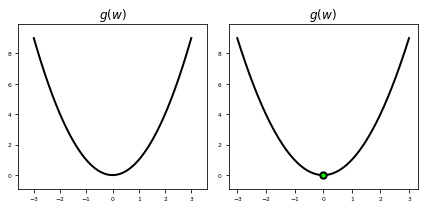

In [5]:
func = lambda w: w**2
show_stationary_1func(func=func)

* The point $w^*=0$ gives the smallest point on the function, i.e., it is smaller than any other point on the function.
<center>
    $g(w^*)\leq g(w)$ for all $w$.
</center>
* This is the **zero-order** definition of a **<font color='red'>global minimum</font>** point.

### Example 2: Global maxima of a quadratic function
<center>
$g(w)=-w^2$
</center>

* If we multiply the quadratic function by $-1$, the function flips upside down.
* Its global minima lie at $\pm \infty$.
* The point $w^*=0$ that used to be a global minimum is now a **<font color='red'>global maximum</font>**, i.e., the largest point on the function.

In [6]:
func = lambda w: -w**2
show_stationary_1func(func=func)

* The global maximum is the point that is larger than any other on the function.
<center>$g(w^*)\geq g(w)$ for all $w$.</center>
* This is the **zero-order** definition of a **<font color=red>global maximum</font>** point.

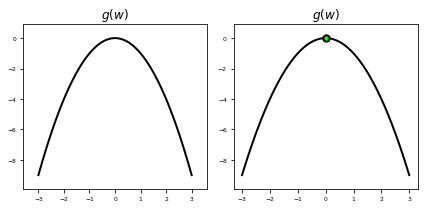

In [7]:
func = lambda w: -w**2
show_stationary_1func(func=func)

* The point that is a <font color='red'>minima</font> of a function $g$ is a <font color='red'>maxima</font> of the function $-g$, and vice-versa. To express our pursuit of a global maxima of a function, we write
<center>
\begin{equation*}
\underset{\mathbf{w}}{\mbox{maximize}}\,\,\,\,g\left(\mathbf{w}\right).
\end{equation*}
</center>
* Since <font color='red'>minima</font> and <font color='red'>maxima</font> are related, we can always express this in terms of our $\mbox{minimize}$ notation as
\begin{equation*}
\underset{\mathbf{w}}{\mbox{maximize}}\,\,\,\,g\left(\mathbf{w}\right) = 
-\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right).
\end{equation*}

### Example 3: Global minima/maxima of a sinusoid
<center>$g(w)=\sin{(3w)}$</center>

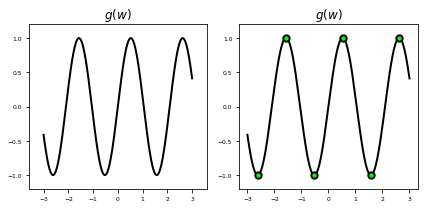

In [8]:
func = lambda w: np.sin(3*w)
show_stationary_1func(func=func)

* Over the range that we plot, there are 3 global minima and 3 global maxima.
* In this example, the function has an infinite number of global minima and maxima.

### Example 4: Minima and maxima of the sum of a sinusoid and a quadratic
\begin{equation*}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation*}

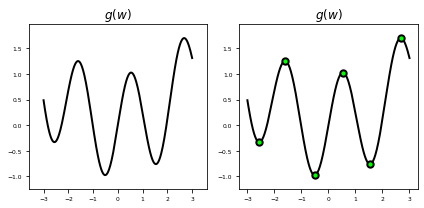

In [9]:
func = lambda w: np.sin(3*w) + 0.1*w**2
show_stationary_1func(func=func)

* A global minimum around $w^*=-0.5$ and a global maximum around $w^*=2.7$.
* We also have minima (e.g., around $w^*=1.5$) and maxima (e.g., around $w^*=0.8$) that are **<font color='red'>locally optimal</font>**. The point $w^*$ is a local minimum of the function $g$ when:
\begin{equation*}
g(w^{\star}) \leq g(w) \,\,\,\text{for all $w$ near $w^{\star}$}
\end{equation*}
* This is the **zero-order** definition of **local minima**. The point $w^*$ is smaller than its neighboring points.

We can generalize the definitions of global minima/maxima and local minima/maxima to a function of any dimension (i.e., in general taking $N$ inputs).

The **<font color='red'>zero-order condition for optimality</font>**. A point $\mathbf{w}^{\star}$ is 
- a global minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \leq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$  
- a global maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$ 
- a local minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \leq  g(\mathbf{w})$ for all $\mathbf{w}$ near $\mathbf{w}^{\star}$  
- a local maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$ near $\mathbf{w}^{\star}$}$  

These definitions are called **<font color='red'>zero-order</font>** because each involves only the function $g$ itself, and nothing else. We also have **<font color='red'>higher order</font>** defitions of optimal points:
- **first-order** definitions involve the first derivative of a function.
- **second-order** definitions involve the second derivative of a function.

# Global Optimization

In [10]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
import math

In [11]:
# custom plot for spiffing up plot of a two mathematical functions
def double_plot(func,num_samples,**kwargs):    
    ## arguments user can tweak from control panel ##
    wmax = 1
    if 'wmax' in kwargs:
        wmax = kwargs['wmax']   
    view = [10,50]
    if 'view' in kwargs:
        view = kwargs['view']
    
    #### setup figure ####
    fig = plt.figure(figsize = (8,6)) 
    gs = gridspec.GridSpec(2, 2,wspace=0.3, hspace=0.8) 

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1],projection='3d')
    ax3 = plt.subplot(gs[2])
    ax4 = plt.subplot(gs[3],projection='3d')

    ###### create 2d panels ######
    # range over which to plot
    w = np.linspace(-wmax,wmax,1000)
     
    # create even grid of sample points, random sample points
    w_even = np.linspace(-wmax,wmax,num_samples)
    w_rand = 2*wmax*np.random.rand(num_samples) - wmax

    ### plot first 2d function - with even grid of points ###
    f = [func(val) for val in w]
    ax1.plot(w,f,color = 'k',zorder = 2, linewidth = 2)
    ax1.plot(w,[s*0 for s in f],color = 'k',zorder = 1, linewidth = 1)    # horizontal axis
   
    ax3.plot(w,f,color = 'k',zorder = 2, linewidth = 2)
    ax3.plot(w,[s*0 for s in f],color = 'k',zorder = 1, linewidth = 1)    # horizontal axis

    f_even = [func(val) for val in w_even]
    ax1.scatter(w_even,f_even,s = 50,c = 'lime',edgecolor = 'k',linewidth = 0.7,zorder = 3)       
    ax1.scatter(w_even,[s*0 for s in w_even],s = 50,c = 'b',edgecolor = 'k',linewidth = 0.7,zorder = 3)      
    
    ### plot second 2d function - with random grid of points ###
    f_rand = [func(val) for val in w_rand]
    ax3.scatter(w_rand,f_rand,s = 50,c = 'lime',edgecolor = 'k',linewidth = 0.7,zorder = 3)            
    ax3.scatter(w_rand,[s*0 for s in w_rand],s = 50,c = 'b',edgecolor = 'k',linewidth = 0.7,zorder = 3)   
    
    ### cleanup panels ###
    # label 2d panels, put axis lines on, etc.,
    ax1.set_xlabel('$w$',fontsize = 12)
    ax1.set_title('$g(w)$',fontsize = 12)
    ax1.grid(False, which='both')
   
    ax3.set_xlabel('$w$',fontsize = 12)
    ax3.set_title('$g(w)$',fontsize = 12)
    ax3.grid(False, which='both')
    
    
    ###### create 3d panels ######   
    w = np.linspace(-wmax,wmax,200)
    w1_vals, w2_vals = np.meshgrid(w,w)
    w1_vals.shape = (len(w)**2,1)
    w2_vals.shape = (len(w)**2,1)
    h = np.concatenate((w1_vals,w2_vals),axis=1)
    func_vals = np.asarray([func(s) for s in h])

    w1_vals.shape = (len(w),len(w))
    w2_vals.shape = (len(w),len(w))
    func_vals.shape = (len(w),len(w))

    ### plot function and z=0 for visualization ###
    ax2.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=0.7,edgecolor = 'k',zorder = 2)
        
    ax4.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=0.7,edgecolor = 'k',zorder = 2)       
        
    ### plot even vals ###
    w = np.linspace(-wmax,wmax,num_samples)
    w1_vals, w2_vals = np.meshgrid(w,w)
    w1_vals.shape = (len(w)**2,1)
    w2_vals.shape = (len(w)**2,1)
    h = np.concatenate((w1_vals,w2_vals),axis=1)
    f_even = np.asarray([func(s) for s in h])
    ax2.scatter(w1_vals,w2_vals,f_even,s = 50,c = 'lime',edgecolor = 'k',linewidth = 0.7,zorder = 3)       
    f_even = [s*0 for s in f_even]
    ax2.scatter(w1_vals,w2_vals,f_even,s = 50,c = 'b',edgecolor = 'k',linewidth = 0.7,zorder = 3)       
    
    ### plot random samples ###
    w_rand1 = 2*wmax*np.random.rand(num_samples**2) - wmax
    w_rand1.shape = (len(w_rand1),1)
    w_rand2 = 2*wmax*np.random.rand(num_samples**2) - wmax
    w_rand2.shape = (len(w_rand2),1)
    h = np.concatenate((w_rand1,w_rand2),axis=1)
    f_rand = [func(val) for val in h]
    ax4.scatter(w_rand1,w_rand2,f_rand,s = 50,c = 'lime',edgecolor = 'k',linewidth = 0.7,zorder = 3)       
    f_rand = [s*0 for s in f_rand]
    ax4.scatter(w_rand1,w_rand2,f_rand,s = 50,c = 'b',edgecolor = 'k',linewidth = 0.7,zorder = 3)       
    
        
    ### cleanup panels ###
    ax2.set_xlabel('$w_1$',fontsize = 12)
    ax2.set_ylabel('$w_2$',fontsize = 12,rotation = 0)
    ax2.set_title('$g(w_1,w_2)$',fontsize = 12)
    ax2.view_init(view[0],view[1])
    
    # clean up axis
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False

    ax2.xaxis.pane.set_edgecolor('white')
    ax2.yaxis.pane.set_edgecolor('white')
    ax2.zaxis.pane.set_edgecolor('white')
    
    ax2.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax2.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax2.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

    ax2.set_xticks([-1,0,1])
    ax2.set_xticklabels([-1,0,1])
    
    ax2.set_yticks([-1,0,1])
    ax2.set_yticklabels([-1,0,1])
    
    ax2.set_zticks([0,1,2])
    ax2.set_zticklabels([0,1,2])
    
    # label axis
    ax4.set_xlabel('$w_1$',fontsize = 12)
    ax4.set_ylabel('$w_2$',fontsize = 12,rotation = 0)
    ax4.set_title('$g(w_1,w_2)$',fontsize = 12)
    ax4.view_init(view[0],view[1])
    
    # clean up axis
    ax4.xaxis.pane.fill = False
    ax4.yaxis.pane.fill = False
    ax4.zaxis.pane.fill = False

    ax4.xaxis.pane.set_edgecolor('white')
    ax4.yaxis.pane.set_edgecolor('white')
    ax4.zaxis.pane.set_edgecolor('white')
    
    ax4.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax4.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax4.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    
    ax4.set_xticks([-1,0,1])
    ax4.set_xticklabels([-1,0,1])
    
    ax4.set_yticks([-1,0,1])
    ax4.set_yticklabels([-1,0,1])
  
    ax4.set_zticks([0,1,2])
    ax4.set_zticklabels([0,1,2])

def random_eval_experiment():
    '''
    Experiment illutrating how quickly global random evaluation will fail as a method of optimization.  Output is minimum value attained by random sampling over the cube [-1,1] x [-1,1] x... [-1,1] evaluating simple quadratic for 100, 1000, or 10000 times.  The dimension is increased from 1 to 100 and the minimum plotted for each dimension.
    '''    
    # define symmetric quadratic N-dimensional
    g = lambda w: np.dot(w.T,w)

    # loop over dimensions, sample directions, evaluate
    mean_evals = []
    big_dim = 100
    num_pts = 10000
    pt_stops = [100,1000,10000]
    for dim in range(big_dim):
        dim_eval = []
        m_eval = []
        for pt in range(num_pts):
            # generate random direction using normalized gaussian                    
            direction = np.random.randn(dim + 1,1)
            norms = np.sqrt(np.sum(direction*direction,axis = 1))[:,np.newaxis]
            direction = direction/norms   
            
            e = g(direction)
            dim_eval.append(e)

            # record mean and std of so many pts
            if (pt+1) in pt_stops:
                m_eval.append(np.min(dim_eval))
        mean_evals.append(m_eval)

    # convert to array for easy access
    mean_evals_global = np.asarray(mean_evals)

    fig = plt.figure(figsize = (6,3))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 
    fig.subplots_adjust(wspace=0.5,hspace=0.01)

    # plot input function
    ax = plt.subplot(gs[0])

    for k in range(len(pt_stops)):
        mean_evals = mean_evals_global[:,k]

        # scatter plot mean value
        ax.plot(np.arange(big_dim)+1,mean_evals)

        # clean up plot - label axes, etc.,
        ax.set_xlabel('dimension of input')
        ax.set_ylabel('funciton value')

    # draw legend
    t = [str(p) for p in pt_stops]
    ax.legend(t, bbox_to_anchor=(1, 0.5))

    # draw horizontal axis
    ax.plot(np.arange(big_dim) + 1,np.arange(big_dim)*0,linewidth=1,linestyle='--',color = 'k')
    plt.show()

def random_local_experiment():
    '''
    Experiment illustrating the ultimate shortcoming of local random search.   Output is fraction of directions that are decreasing on a simple quadratic centered at the point [1,0,0...] as we increase the dimension of the function
    
    '''
    # define symmetric quadratic N-dimensional
    g = lambda w: np.dot(w.T,w)
    
    # loop over dimensions, sample points, evaluate
    mean_evals = []
    big_dim = 25
    num_pts = 10000
    pt_stops = [100,1000,10000]
    for dim in range(big_dim):
        # containers for evaluation
        dim_eval = []
        m_eval = []

        # starting vector
        start = np.zeros((dim+1,1))
        start[0] = 1

        for pt in range(num_pts):
            # generate random point on n-sphere
            r = np.random.randn(dim+1)
            r.shape = (len(r),1)
            pt_norm = math.sqrt(np.dot(r.T,r))
            r = [b/pt_norm for b in r]
            r+=start

            # compare new direction to original point
            if g(r) < g(start):
                dim_eval.append(1)
            else:
                dim_eval.append(0)

            # record mean and std of so many pts
            if (pt+1) in pt_stops:
                m_eval.append(np.mean(dim_eval))

        # store average number of descent directions
        mean_evals.append(m_eval)

    # convert to array for easy access
    mean_evals_global = np.asarray(mean_evals)

    fig = plt.figure(figsize = (6,3))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 
    fig.subplots_adjust(wspace=0.5,hspace=0.01)

    # plot input function
    ax = plt.subplot(gs[0])

    for k in range(len(pt_stops)):
        mean_evals = mean_evals_global[:,k]

        # scatter plot mean value
        ax.plot(np.arange(big_dim)+1,mean_evals)

        # clean up plot - label axes, etc.,
        ax.set_xlabel('dimension of input')
        ax.set_ylabel('fraction of directions descennding')

    # draw legend
    t = [str(p) for p in pt_stops]
    ax.legend(t, bbox_to_anchor=(1, 0.5))

    # draw horizontal axis
    ax.plot(np.arange(big_dim) + 1,np.arange(big_dim)*0,linewidth=1,linestyle='--',color = 'k')

    plt.show()

### Example 1: Evaluating a quadratic function to determine its minimum

\begin{array}
\
g(w) = w^2 + 0.2\\
g(w_1,w_2) = w_1^2 + w_2^2 + 0.2
\end{array}

* To determine the smallest point of a function taking in **one** or **two** inputs, we can draw the function and determine where the smallest point lies.
* We can mimic this visual approach by simply evaluating a function over a large number of inputs input points and designating the input that provides the smallest result as our **approximate** global minimum.

For continuous functions, there are an infinite number of points to try. We can take two approaches for choosing a (finite) set of input points to test:

- We can sample them **uniformly** over an evenly spaced grid.
- We can pick the same number of input points at **random**.

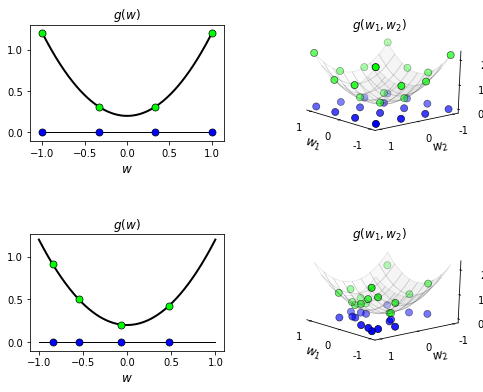

In [12]:
func = lambda w: np.dot((w-0).T,(w-0)) + 0.2
num_samples = 4
view = [20,140]
double_plot(func,num_samples,view = view)

Randomly sampling has a better chance of obtaining a point closer to a global minimum than sampling evenly across the space.

In [13]:
func = lambda w: np.dot(w.T,w) + 0.2
num_samples = 20
view = [20,140]
double_plot(func,num_samples,view = view)

Using enough samples we could find an input very close to the true global minimum of the function.

### The curse of dimensionality

- When we employ the simple zero-order optimality condition for global optimization, from a set of $K$ chosen inputs $\left\{\mathbf{w}^k \right\}_{k=1}^K$ we are choosing the one input $\mathbf{w}^{j}$ lowest on the cost function 
\begin{equation}
g\left(\mathbf{w}^{j}\right) \leq g\left(\mathbf{w}^{k}\right) \,\,\,\,\,\,\,\,\, k=1,...,K
\end{equation}
which is indeed an approximation to the zero-order optimality condition.

- This **naive** zero-order evaluation apparoach only works for low-dimensiona functions.
- For larger dimensional inputs, especially in modern machine learning/deep learning where loss functions have input dimensions ranging from the hundreds to the hundreds of millions, this naive approach is unusable.

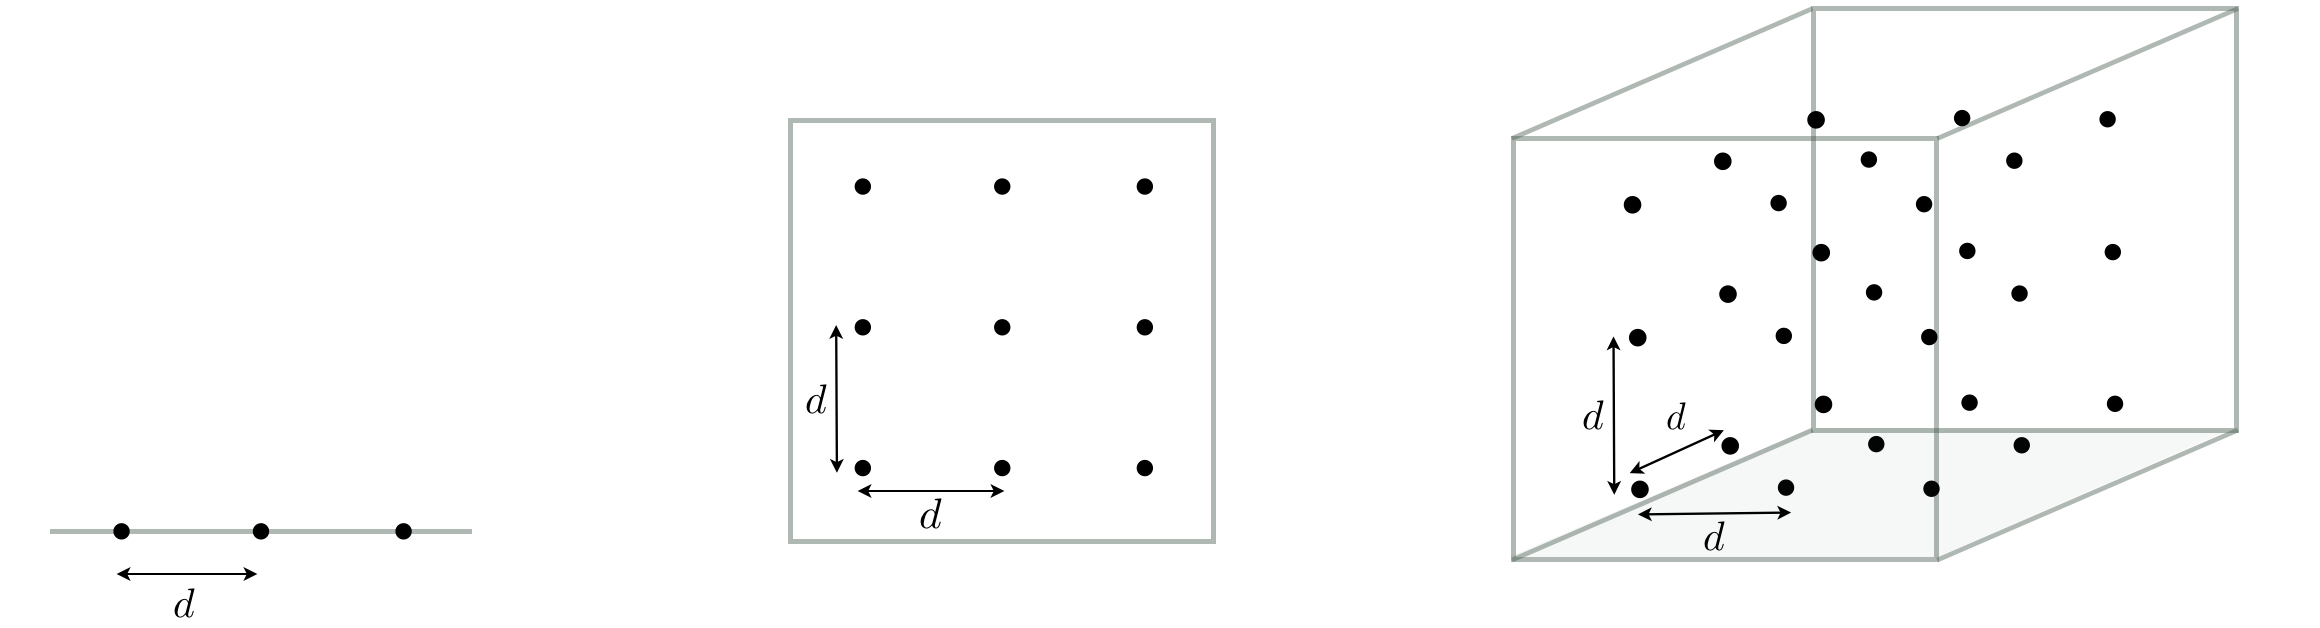

The number of input points we must sample evenly if we wish each to be a distrance $d$ from its neighbors grow **exponentially** as the input dimension of the function increases.

- $N=1$: e.g., we need 3 points to evenly cover the input space.
- $N=2$: To get the same coverage, we need $3^2=9$ points.
- $N=3$: We need $3^3=27$ points.

In general, we need $3^N$ input points evenly spaced in order to be a distance of $d$ apart from one another. This is an example of the **curse of dimensionality**.

- Random sampling can't address the curse of dimensionality either. For example, we sample 10 random points and see how they distribute over the input space as the dimension increases.

-  As we increase the dimension of the input space, the average number of samples per unit hypercube drops exponentially and leaves more and more regions of the space without a single sample.

- If a function's global minimum lies in one of these exponentially growing number empty spaces we will never have access to even the points nearby it. In order to counteract this problem we would need to start sampling exponentially many points.

### Global Optimization

To better address global optimization with high-dimensional input space, we need better search strategies rather than the naive random sampling or uniform sampling.

* <a href="https://en.wikipedia.org/wiki/Evolutionary_algorithm">Evolutionary Algorithms</a>
* <a href="https://en.wikipedia.org/wiki/Metaheuristic">Meta-heuristics</a>
* <a href="https://en.wikipedia.org/wiki/Simulated_annealing">Simulated Annealing</a>
* <a href="https://en.wikipedia.org/wiki/Linear_programming">Linear Programming</a>
* <a href="https://en.wikipedia.org/wiki/Nonlinear_programming">Non-linear Programming</a>
* <a href="https://en.wikipedia.org/wiki/Bayesian_optimization">Bayesian Optimization</a>


# Local Optimization

Local optimization methods often sequentially refine a single sample input called an **initial point** until it reaches an **approximate minimum**.

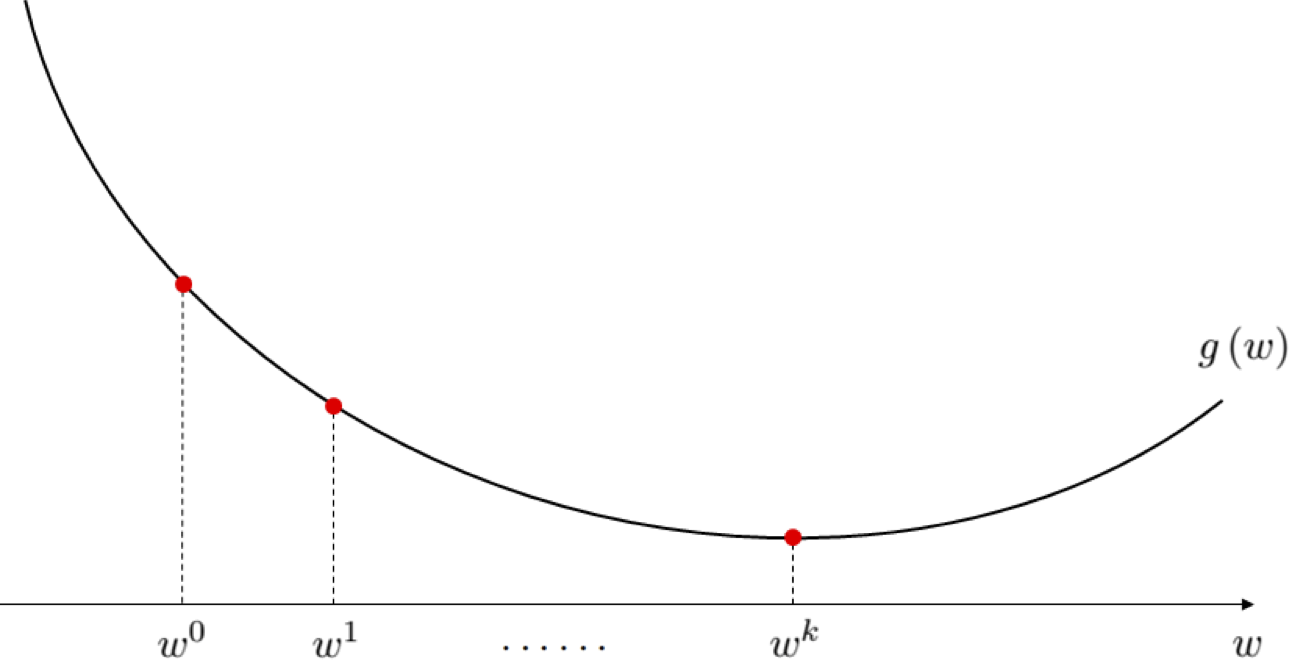

A generic local optimization method consists of a sequence of steps starting with the initialization $w^0$, then move to $w^1$, and on to $w^2$, $\ldots, w^k$, moving towards lower points on the cost function like a ball rolling downhill:
\begin{equation*}
g\left(\mathbf{w}^0\right) > g\left(\mathbf{w}^1\right)\, > \,\cdots\,> g\left(\mathbf{w}^k\right)
\end{equation*}
where each subsequent point is often on a lower portion of the function.

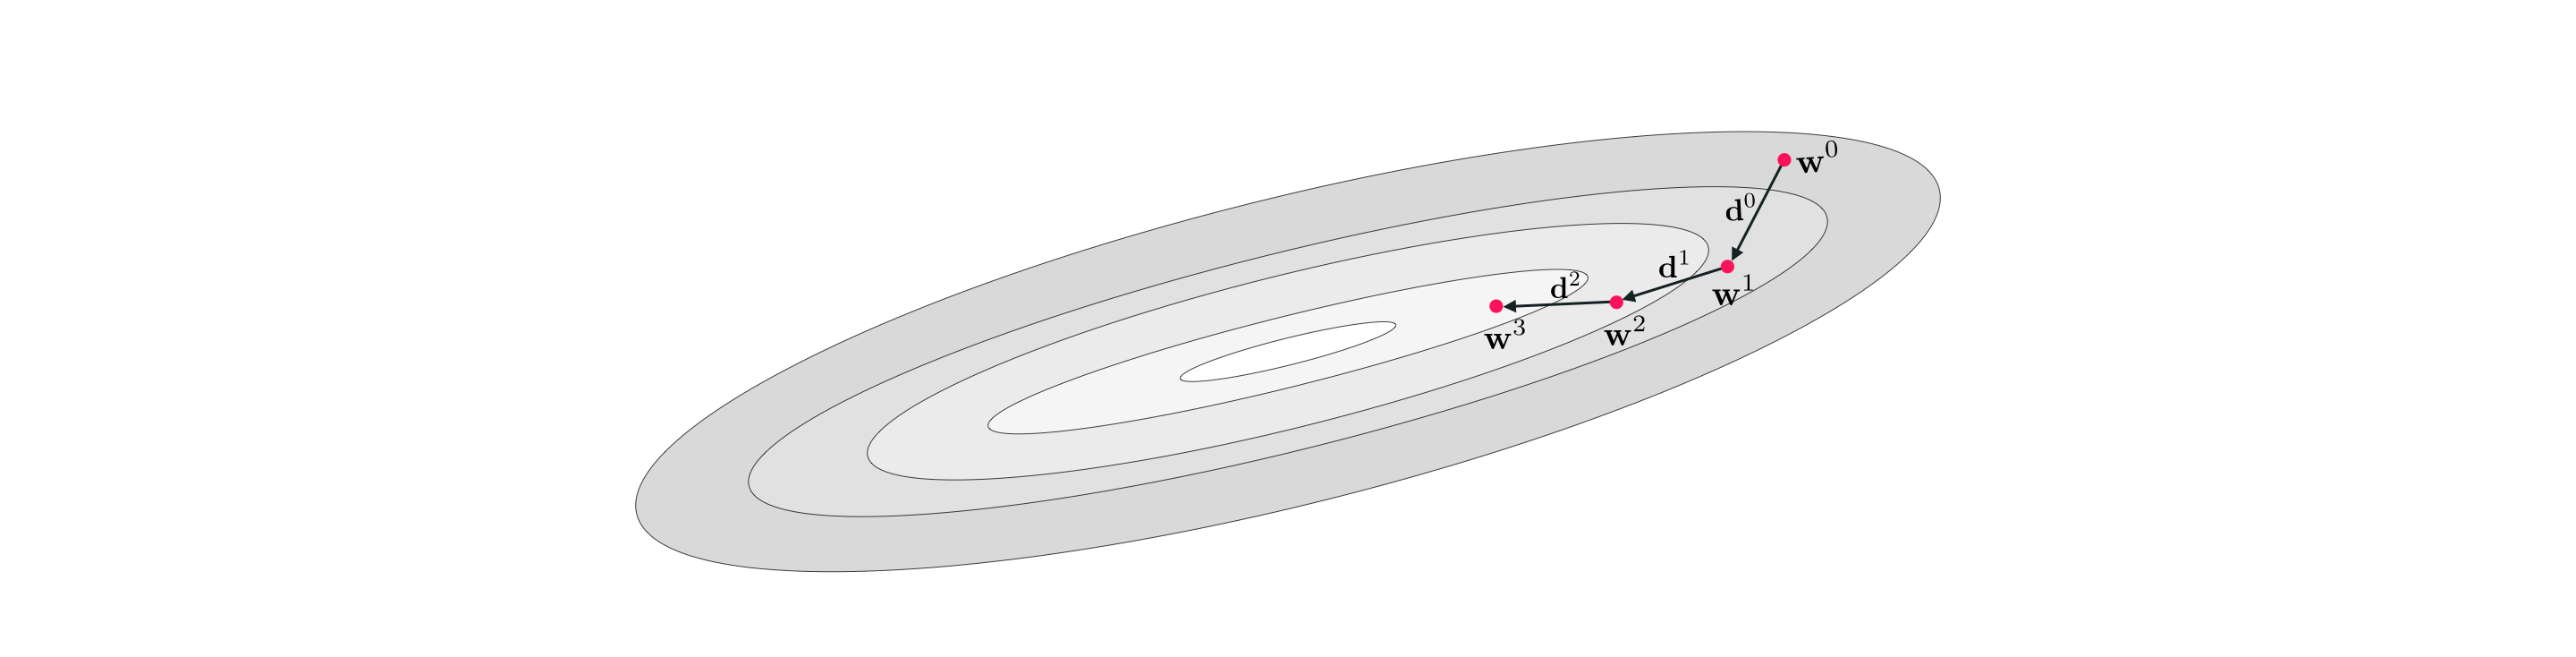

\begin{equation*}
\begin{array}
\
\mathbf{w}^0 \\
\mathbf{w}^1 = \mathbf{w}^0 + \mathbf{d}^0  \\
\mathbf{w}^2 = \mathbf{w}^1 + \mathbf{d}^1  \\
\mathbf{w}^3 = \mathbf{w}^2 + \mathbf{d}^2  \\
\,\,\vdots \,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\, \vdots\\
\mathbf{w}^K = \mathbf{w}^{K-1} + \mathbf{d}^{K-1}
\end{array}
\end{equation*}

where $\mathbf{d}^{k-1}$ is the **<font color='red'>descent direction</font>** defined at the $k^{th}$ step of the process

\begin{equation*}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \mathbf{d}^{k-1} 
\end{equation*}

and $g(\mathbf{w}^0) > g(\mathbf{w}^1) > g(\mathbf{w}^2) > \cdots > g(\mathbf{w}^{K}) $.  

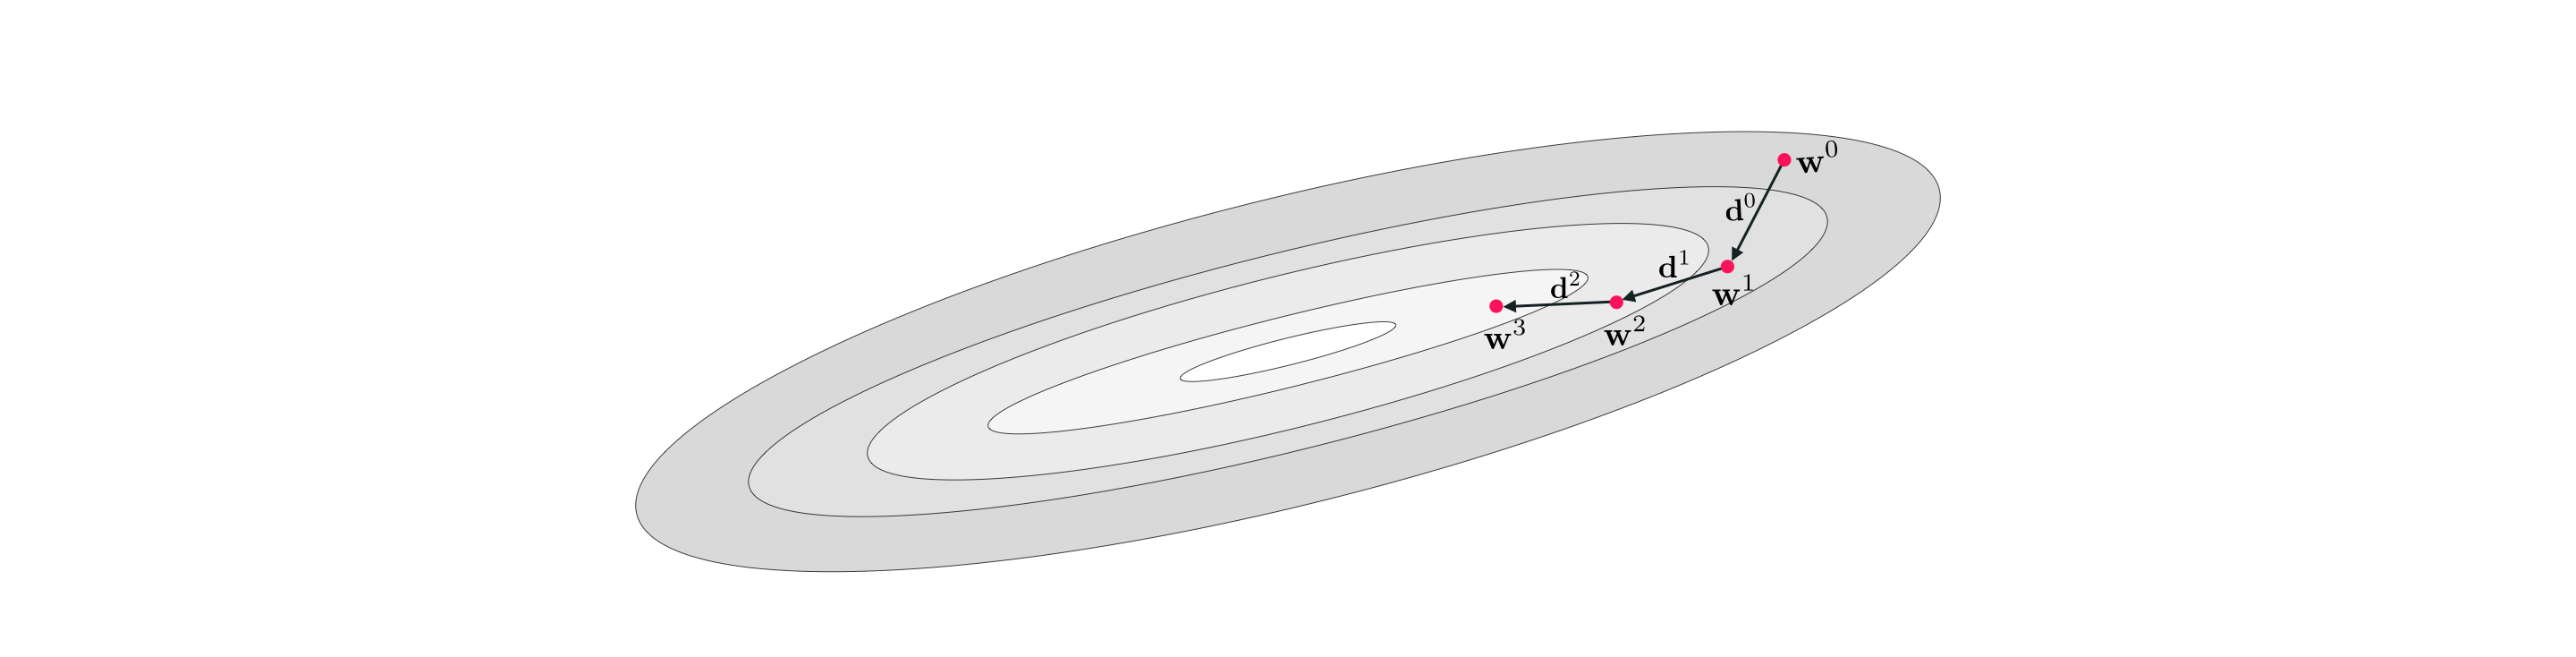

\begin{equation*}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \mathbf{d}^{k-1} 
\end{equation*}
* How can we find these **descent directions** from each subsequent update?
* There are **zero**, **first**, and **second** order approaches.
* How the descent directions are determined distinguishes one local optimization method from one another.

### The steplength parameter

- At each step, we move a distance precisely equal to the length of the $\left(k-1\right)^{th}$ descent direction:
\begin{equation}
\left \Vert\mathbf{w}^{k} - \mathbf{w}^{k-1}  \right\Vert_2 = \left \Vert\ \left(\mathbf{w}^{k-1} + \mathbf{d}^{k-1}\right) - \mathbf{w}^{k-1}  \right\Vert_2 =  \left \Vert  \mathbf{d}^{k-1} \right \Vert_2.
\end{equation}

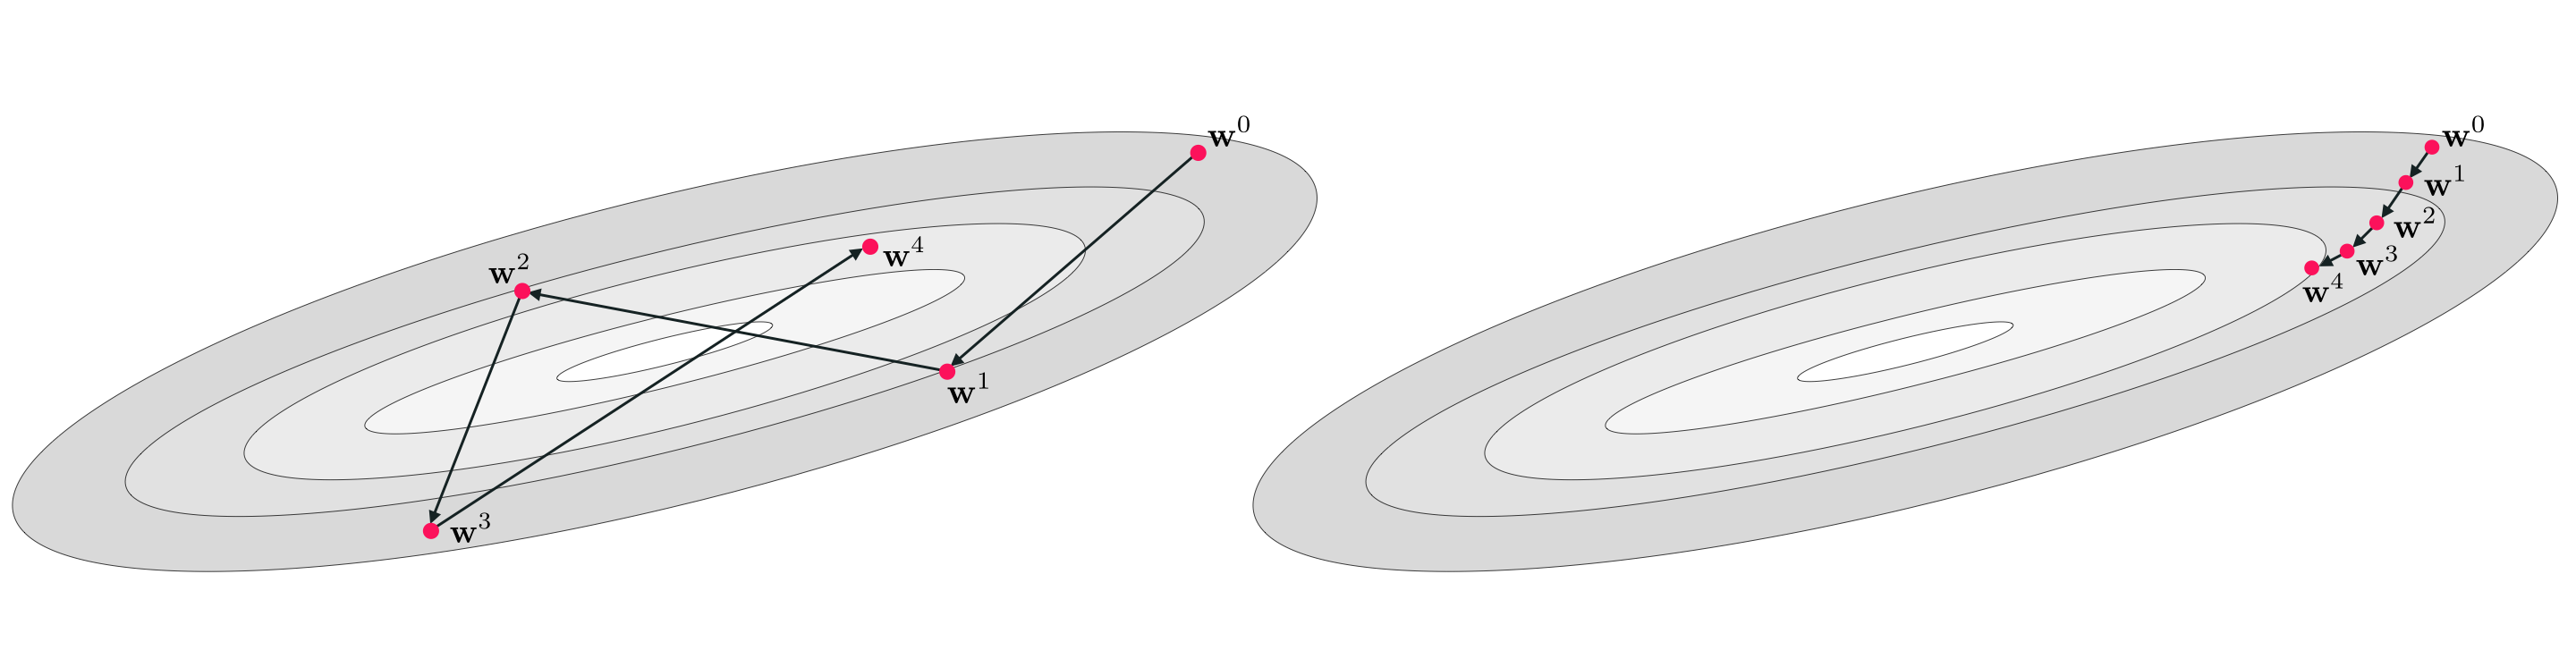

- Even if the descent directions point in the right direction, their **length** can be problematic.
- If they are too long, a local method can **oscillate** wildy at each update step, and never reaches an approximate minimum.
- If they are too short, a local method may move slowly and takes too many steps to reach an approximate minimum

* Many local optimization methods employ what is called a **<font color='red'>steplength parameter</font>** (or a **<font color='blue'>learning rate</font>** in machine learning / deep learning) that helps us control the length of each update step.

- With a steplength parameter, the $k^{th}$ update step is written as:
\begin{equation*}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}.
\end{equation*}
- The entire sequence of $K$ steps then similarly is written as 

\begin{equation}
\begin{array}
\
\mathbf{w}^0 \\
\mathbf{w}^1 = \mathbf{w}^0 + \alpha \mathbf{d}^0  \\
\mathbf{w}^2 = \mathbf{w}^1 + \alpha \mathbf{d}^1  \\
\mathbf{w}^3 = \mathbf{w}^2 + \alpha \mathbf{d}^2  \\
\,\,\vdots \,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\, \vdots\\
\mathbf{w}^K = \mathbf{w}^{K-1} + \alpha \mathbf{d}^{K-1}
\end{array}
\end{equation}

- The distance traveled by the $k^{th}$ step with the steplength $\alpha$ is:
\begin{equation*}
\left \Vert\mathbf{w}^{k} - \mathbf{w}^{k-1}  \right\Vert_2 = \left \Vert\ \left(\mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}\right) - \mathbf{w}^{k-1}  \right\Vert_2 = \alpha  \left \Vert  \mathbf{d}^{k-1} \right \Vert_2.
\end{equation*}
- The length of the $k^{th}$ step is proportional to the descent direction, and we can fine-tune how far we wish to travel by setting $\alpha$.

# Random Search

In [14]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import autograd.numpy as np
import math

In [15]:
class Visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 

    ##### draw picture of function and run for single-input function ####       
    def single_input_plot(self,g,weight_histories,cost_histories,**kwargs):        
        # adjust viewing range
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
            
        onerun_perplot = False
        if 'onerun_perplot' in kwargs:
            onerun_perplot = kwargs['onerun_perplot']
            
        ### initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]); 

        ### plot function in both panels
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = g(w_plot)
        gmin = np.min(g_plot)
        gmax = np.max(g_plot)
        g_range = gmax - gmin
        ggap = g_range*0.1
        gmin -= ggap
        gmax += ggap
        
        # plot function, axes lines
        ax1.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax1.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.set_xlabel(r'$w$',fontsize = 13)
        ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
        ax1.set_xlim(wmin,wmax)
        ax1.set_ylim(gmin,gmax)
        
        ax2.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax2.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.set_xlabel(r'$w$',fontsize = 13)
        ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)   
        ax2.set_xlim(wmin,wmax)
        ax2.set_ylim(gmin,gmax)        
       
        #### loop over histories and plot each
        for j in range(len(weight_histories)):
            w_hist = weight_histories[j]
            c_hist = cost_histories[j]
            
            # colors for points --> green as the algorithm begins, yellow as it converges, red at final point
            s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
            s.shape = (len(s),1)
            t = np.ones(len(w_hist[round(len(w_hist)/2):]))
            t.shape = (len(t),1)
            s = np.vstack((s,t))
            self.colorspec = []
            self.colorspec = np.concatenate((s,np.flipud(s)),1)
            self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
            
            ### plot all history points
            ax = ax2
            if onerun_perplot == True:
                if j == 0:
                    ax = ax1
                if j == 1:
                    ax = ax2
            for k in range(len(w_hist)):
                # pick out current weight and function value from history, then plot
                w_val = w_hist[k]
                g_val = c_hist[k]
                ax.scatter(w_val,g_val,s = 90,color = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax.scatter(w_val,0,s = 90,facecolor = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)

    ##### draw picture of function and run for two-input function ####       
    def two_input_surface_contour_plot(self,g,w_hist,**kwargs):
        ### input arguments ###        
        num_contours = 10
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']
           
        view = [20,20]
        if 'view' in kwargs:
            view = kwargs['view']
            
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (11,5))
        self.edgecolor = 'k'

        # create subplot with 3 panels, plot input function in center plot
        # this seems to be the best option for whitespace management when using
        # both a surface and contour plot in the same figure
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,5,10]) 
        ax1 = plt.subplot(gs[1],projection='3d'); 
        ax2 = plt.subplot(gs[2],aspect='equal'); 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # plot 3d surface and path in left panel
        self.draw_surface(g,ax1,**kwargs)
        self.show_inputspace_path(w_hist,ax1)
        ax1.view_init(view[0],view[1])
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.draw_weight_path(ax2,w_hist)              # draw path on contour plot

        # plot
        plt.show()
 

        
    # compare cost histories from multiple runs
    def plot_cost_histories(self,histories,start,**kwargs):
        # plotting colors
        colors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 
        
        # any labels to add?        
        labels = [' ',' ']
        if 'labels' in kwargs:
            labels = kwargs['labels']
            
        # plot points on cost function plot too?
        points = False
        if 'points' in kwargs:
            points = kwargs['points']

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(histories)):
            history = histories[c]
            label = 0
            if c == 0:
                label = labels[0]
            else:
                label = labels[1]
                
            # check if a label exists, if so add it to the plot
            if np.size(label) == 0:
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c]) 
            else:               
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c],label = label) 
                
            # check if points should be plotted for visualization purposes
            if points == True:
                ax.scatter(np.arange(start,len(history),1),history[start:],s = 90,color = colors[c],edgecolor = 'w',linewidth = 2,zorder = 3) 


        # clean up panel
        xlabel = 'step $k$'
        if 'xlabel' in kwargs:
            xlabel = kwargs['xlabel']
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        if 'ylabel' in kwargs:
            ylabel = kwargs['ylabel']
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        if np.size(label) > 0:
            anchor = (1,1)
            if 'anchor' in kwargs:
                anchor = kwargs['anchor']
            plt.legend(loc='upper right', bbox_to_anchor=anchor)
            #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

        ax.set_xlim([start - 0.5,len(history) - 0.5])
        
       # fig.tight_layout()
        plt.show()

        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec


    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,color = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx
                
                
                    # draw arrows connecting pairwise points
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='w', ec='w',linewidth=0.25,zorder = 2,length_includes_head=True)
        
    ### draw surface plot
    def draw_surface(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']   
            
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,200)
        w2 = np.linspace(ymin,ymax,200)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([g(np.reshape(s,(2,1))) for s in h])

        ### plot function as surface ### 
        w1_vals.shape = (len(w1),len(w2))
        w2_vals.shape = (len(w1),len(w2))
        func_vals.shape = (len(w1),len(w2))
        ax.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

        # plot z=0 plane 
        ax.plot_surface(w1_vals, w2_vals, func_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 
                
        # clean up axis
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('white')
        ax.yaxis.pane.set_edgecolor('white')
        ax.zaxis.pane.set_edgecolor('white')

        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,rotation = 0)
        ax.set_title('$g(w_0,w_1)$',fontsize = 14)
        

    ### plot points and connectors in input space in 3d plot        
    def show_inputspace_path(self,w_hist,ax):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        for k in range(len(w_hist)):
            pt1 = w_hist[k]
            ax.scatter(pt1[0],pt1[1],0,s = 60,color = colorspec[k],edgecolor = 'k',linewidth = 0.5*math.sqrt((1/(float(k) + 1))),zorder = 3)
            if k < len(w_hist)-1:
                pt2 = w_hist[k+1]
                if np.linalg.norm(pt1 - pt2) > 10**(-3):
                    # draw arrow in left plot
                    a = Arrow3D([pt1[0],pt2[0]], [pt1[1],pt2[1]], [0, 0], mutation_scale=10, lw=2, arrowstyle="-|>", color="k")
                    ax.add_artist(a)
        

            
# animator for random local search
def visualize3d(func,pt_history,eval_history,**kwargs):
    ### input arguments ###        
    wmax = 1
    if 'wmax' in kwargs:
        wmax = kwargs['wmax'] + 0.5
        
    view = [20,-50]
    if 'view' in kwargs:
        view = kwargs['view']
        
    axes = False
    if 'axes' in kwargs:
        axes = kwargs['axes']
       
    plot_final = False
    if 'plot_final' in kwargs:
        plot_final = kwargs['plot_final']
      
    num_contours = 10
    if 'num_contours' in kwargs:
        num_contours = kwargs['num_contours']
        
    pt = [0,0]
    if 'pt' in kwargs:
        pt = kwargs['pt']
    pt = np.asarray(pt)
    pt.shape = (2,1)
     
    max_steps = 10
    if 'max_steps' in kwargs:
        max_steps = kwargs['max_steps']
    num_samples = 10
    if 'num_samples' in kwargs:
        num_samples = kwargs['num_samples'] 
    steplength = 1
    if 'steplength' in kwargs:
        steplength = kwargs['steplength']     
        
    ##### construct figure with panels #####
    # construct figure
    fig = plt.figure(figsize = (9,3))
          
    # remove whitespace from figure
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        
    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,2]) 
    ax = plt.subplot(gs[0],projection='3d'); 
    ax2 = plt.subplot(gs[1],aspect='equal'); 
    
    #### define input space for function and evaluate ####
    w = np.linspace(-wmax,wmax,200)
    w1_vals, w2_vals = np.meshgrid(w,w)
    w1_vals.shape = (len(w)**2,1)
    w2_vals.shape = (len(w)**2,1)
    h = np.concatenate((w1_vals,w2_vals),axis=1)
    func_vals = np.asarray([func(s) for s in h])
    w1_vals.shape = (len(w),len(w))
    w2_vals.shape = (len(w),len(w))
    func_vals.shape = (len(w),len(w))
    
    # plot function 
    ax.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

    # plot z=0 plane 
    ax.plot_surface(w1_vals, w2_vals, func_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 
    
    ### make contour right plot - as well as horizontal and vertical axes ###
    ax2.contour(w1_vals, w2_vals, func_vals,num_contours,colors = 'k')
    if axes == True:
        ax2.axhline(linestyle = '--', color = 'k',linewidth = 1)
        ax2.axvline(linestyle = '--', color = 'k',linewidth = 1)
    
    ### plot circle on which point lies, as well as step length circle - used only for simple quadratic
    if plot_final == True:
        # plot contour of quadratic on which final point was plotted
        f = pt_history[-1]
        val = np.linalg.norm(f)
        theta = np.linspace(0,1,400)
        x = val*np.cos(2*np.pi*theta) 
        y = val*np.sin(2*np.pi*theta) 
        ax2.plot(x,y,color = 'r',linestyle = '--',linewidth = 1)

        # plot direction sampling circle centered at final point
        x = steplength*np.cos(2*np.pi*theta) + f[0]
        y = steplength*np.sin(2*np.pi*theta) + f[1]
        ax2.plot(x,y,color = 'b',linewidth = 1)    
    
    # colors for points
    s = np.linspace(0,1,len(eval_history[:round(len(eval_history)/2)]))
    s.shape = (len(s),1)
    t = np.ones(len(eval_history[round(len(eval_history)/2):]))
    t.shape = (len(t),1)
    s = np.vstack((s,t))
    colorspec = []
    colorspec = np.concatenate((s,np.flipud(s)),1)
    colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
    
    #### scatter path points ####
    for k in range(len(eval_history)):
        ax.scatter(pt_history[k][0],pt_history[k][1],0,s = 60,color = colorspec[k],edgecolor = 'k',linewidth = 0.5*math.sqrt((1/(float(k) + 1))),zorder = 3)
        
        ax2.scatter(pt_history[k][0],pt_history[k][1],s = 60,color = colorspec[k],edgecolor = 'k',linewidth = 1.5*math.sqrt((1/(float(k) + 1))),zorder = 3)

    #### connect points with arrows ####
    for i in range(len(eval_history)-1):
        pt1 = pt_history[i]
        pt2 = pt_history[i+1]

        if np.linalg.norm(pt1 - pt2) > 0.5:
            # draw arrow in left plot
            a = Arrow3D([pt1[0],pt2[0]], [pt1[1],pt2[1]], [0, 0], mutation_scale=10, lw=2, arrowstyle="-|>", color="k")
            ax.add_artist(a)

            # draw 2d arrow in right plot
            ax2.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*0.78,(pt2[1] - pt1[1])*0.78, head_width=0.1, head_length=0.1, fc='k', ec='k',linewidth=3,zorder = 2,length_includes_head=True)

    ### cleanup panels ###
    ax.set_xlabel('$w_0$',fontsize = 12)
    ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
    ax.set_title('$g(w_0,w_1)$',fontsize = 12)
    ax.view_init(view[0],view[1])
    
    ax2.set_xlabel('$w_0$',fontsize = 12)
    ax2.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
    
    # clean up axis
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.set_edgecolor('white')
    
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    
    # plot
    plt.show()

#### custom 3d arrow and annotator functions ###    
# nice arrow maker from https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

\begin{equation*}
\mathbf{w}^{k} = \mathbf{w}^{k-1} + \mathbf{d}^{k-1}.
\end{equation*}

The **<font color='red'>random local search</font>** (or just *random search*) find the descent direction at the $k^{th}$ update step by:
1. Sampling a given number of random directions stemming from $\mathbf{w}^{k-1}$,
2. Evaluating each candidate update point,
3. Choose the one that gives the smallest evaluation (if it is lower on the function than our current point $\mathbf{w}^{k-1}$).

We look **<font color='red'>locally around the current point</font>** in a fixed number of **random directions** for a point that has a lower evaluation, and if we find one we move to it.

For example, we want to minimize the simple quadratic $g(w_1,w_2) = w_1^2 + w_2^2 + 2$ or $g(\mathbf{w}) = \mathbf{w}^T \mathbf{w}^{\,} + 2$. We set the number of random directions $P = 3$.

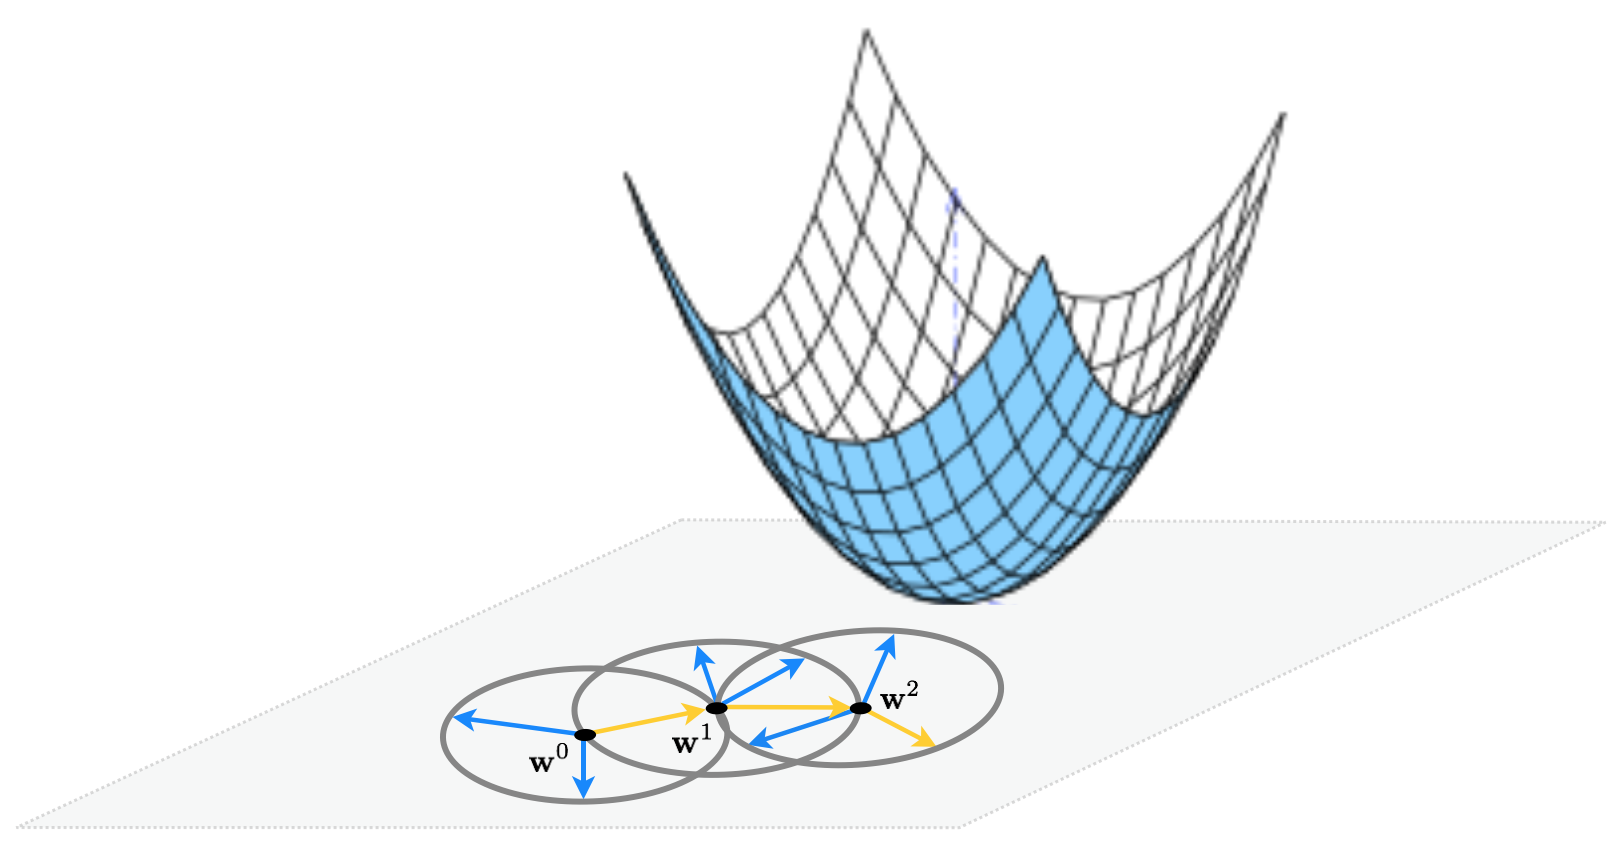

- $P=3$ random directions are examined at each step.
- The chosen descent direction is colored yellow.

- At the $k^{th}$ step, we pick a number $P$ of random directions to try out.
- Generating the $p^{th}$ random direction $\mathbf{d}^p$ stemming from the previous step $\mathbf{w}^{k-1}$, we have a candidate point to evaluate

\begin{equation*}
\mathbf{w}_{\text{candidate}} = \mathbf{w}^{k-1} + \mathbf{d}^{p}
\end{equation*}

- After evaluating all $P$ candidate points we pick the one that gives us the **<font color='red'>smallest</font>** evaluation:
\begin{equation*}
s = \underset{p=1...P}{\text{argmin}}\,\,g\left(\mathbf{w}^{k-1} +  \mathbf{d}^p\right)
\end{equation*}

- If best point found has a smaller evaluation than the current point, i.e., if  $g\left(\mathbf{w}^{k-1} + \mathbf{d}^s\right) < g\left(\mathbf{w}^{k-1}\right)$ then we move to the new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \mathbf{d}^s$.
- Otherwise we examine another batch of $P$ random directions and try again.

- How to generate a set of directions at each step randomly?

- We could use some distribution, e.g., a Gaussian, to samples our candidate directions.
- Each candidate direction can have different lengths.
- To keep random candidate directions consistent, we can **<font color='red'>normalize</font>** them to have $\Vert \mathbf{d} \Vert_2 = 1$ .


- At each step of the algorithm, we move a distance of length one:
\begin{equation*}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \mathbf{d}\right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \mathbf{d}  \Vert_2 = 1.
\end{equation*}    

- If we use the **steplength parameter** $\alpha$, we can control how far we travel with each step:
\begin{equation*}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \alpha\mathbf{d} \right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha
\end{equation*}

In [16]:
 # random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

### Example 1: Random search to minimize a simple quadratic

\begin{equation*}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation*}

- We start from $\mathbf{w}^0 = \begin{bmatrix}3 & 4\end{bmatrix}^T$.
- We run random local search for 5 steps with $\alpha=1$ for all steps.
- At each step, we generate $P=1000$ randon candidate directions.

In [17]:
plotter = Visualizer()

In [18]:
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)
plotter.two_input_surface_contour_plot(g,weight_history,view = [10,30],xmin = -4.5, xmax = 4.5, ymin = -4.5, ymax = 4.5)

- Contour plots are only available for input dimension $N=2$.
- A more general way to view the steps from a particular run of any local method is to plot the corresponding sequence of function evaluations.

- If the history from a local method is $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$, we plot corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ as pairs $\left(k\,, g\left(\mathbf{w}^k\right)\right)$

In [19]:
plotter.plot_cost_histories([cost_history],start = 0,points = True)

### Example 2: Minimizing a function with many local minima using random search

\begin{equation*}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation*}

- We initialize two runs at $w^0 = 4.5$ and $w^0 = -1.5$.
- For both runs, we use the steplength $\alpha=0.1$ for all 10 iterations. We may end up near a local or global minimum.

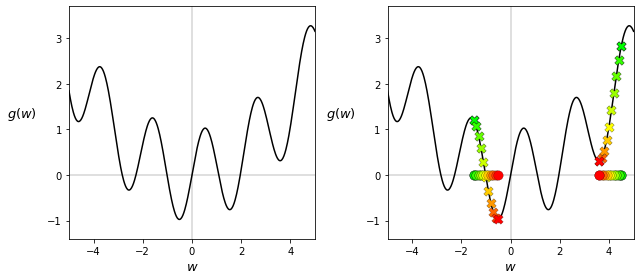

In [20]:
g = lambda w: np.sin(3*w) + 0.1*w**2
alpha_choice = 0.1; w = 4.5; num_samples = 10; max_its = 10;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
alpha_choice = 0.1; w = -1.5; num_samples = 10; max_its = 10;
weight_history_2,cost_history_2 = random_search(g,alpha_choice,max_its,w,num_samples)
plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -5,wmax = 5)

- In the previous experiments, the steplength parameter $\alpha$ is set **<font color='red'>fixed</font>** for all steps of each run.
- This is called the **fixed steplength rule**.
- A rule that adjusts the value of $\alpha$ from step-to-step is called the **adjustable steplength rule**.

- A common adjustable steplength rule used in local optimization for machine learning / deep learning is the so-called **diminishing steplength rule**.

### Example 3: Unit-length steps fail to converge to global minimum
\begin{equation*}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation*}

- We start from $\mathbf{w}^0 = \begin{bmatrix}1.5 & 2\end{bmatrix}^T$. We run random local search with $\alpha=1$ for all steps.
- At each step, we generate $P=1000$ randon candidate directions.

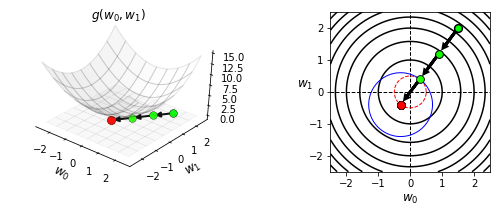

In [21]:
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
view = [40,-50]
visualize3d(g,weight_history_1,cost_history_1,view = view,wmax=max(w[0],w[1]),plot_final = True,axes = True)

- The algorithm stopped after taking 3 steps. Every point on the blue unit circle lies on a contour that is greater than or equal to the one on which the final point lies.
- The problem is that each direction we take must have length one because we set $\alpha=1$ for all steps.

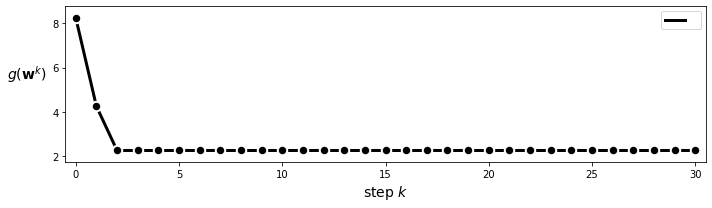

In [22]:
plotter.plot_cost_histories([cost_history_1],start = 0,points = True)

- If we take shorter steps, we could descend onto lower contours of the function and get closer to the global minimum.
- This can be achieved by using a smaller value for the steplength parameter $\alpha$.

In [23]:
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 0.1; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_2,cost_history_2 = random_search(g,alpha_choice,max_its,w,num_samples)
view = [40,-50]
visualize3d(g,weight_history_2,cost_history_2,view = view,wmax=max(w[0],w[1]),plot_final = False,axes = True)

- We make the same run but now we set $\alpha=0.1$ for all steps.
- The algorithm converges to a point much closer to the global minimum of the function at $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

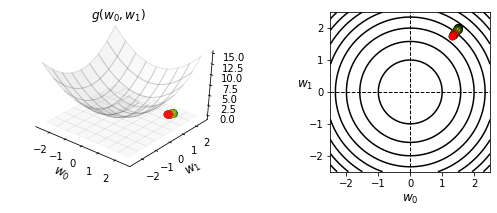

In [24]:
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 0.01; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_3,cost_history_3 = random_search(g,alpha_choice,max_its,w,num_samples)
view = [40,-50]
visualize3d(g,weight_history_3,cost_history_3,view = view,wmax=max(w[0],w[1]),plot_final = False,axes = True)

- We make the same run but now we set $\alpha=0.01$ for all steps, we do not reach a point anywhere near the global minimum.

- A small steplength combined with a large number of steps can converge toward a local minimum, but can be very computationally expensive.
- A large steplength and a small number of maximum iterations can be cheapter but less effective at finding small evaluation points.

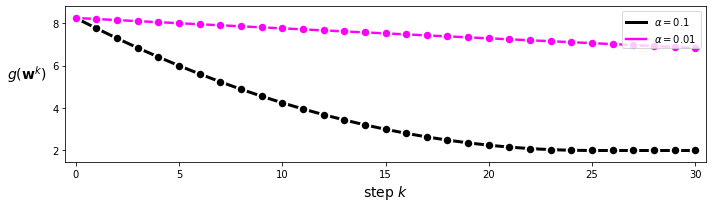

In [25]:
plotter.plot_cost_histories([cost_history_2,cost_history_3],start = 0,points = True,labels = [r'$\alpha = 0.1$',r'$\alpha = 0.01$'])

- We can change the value of the steplength at each step.
- One approach is to **diminish** the size of the steplength at each step.
- This is called the **diminishing steplength rule**.
- This is a safe choice of steplength, because the algorithm can get into any ''small nooks and crannies'' where the minima may lie.

- A common way of producing a diminishing steplength is to set $\alpha = \frac{1}{k}$ at the $k^{th}$ step.  
- This gives us the benefit of shrinking the distance between subsequent steps as we progress on a run since with this choice of steplength and a unit-length descent direction we have:
\begin{equation*}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \alpha\mathbf{d}\right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha = \frac{1}{k}.
\end{equation*}

- If we sum up the total distance the algorithm travels in $K$ steps (provided we indeed move at each step) we can then consequentially compute
\begin{equation*}
\sum_{k=1}^{K} \Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \sum_{k=1}^{K}\frac{1}{k}
\end{equation*}

The advantages of this choise of steplength is that:
- The stepsize decreases to zero as $k$ increases, i.e.,  $\alpha = \frac{1}{k} \longrightarrow 0$
- The total distance traveled by the algorithm goes to infinity as $k$ increases, $\sum_{k=1}^{K}\frac{1}{k} \longrightarrow \infty$ (we have $\sum_{k=1}^{\infty}\frac{1}{k} = \infty$ is *[harmonic series](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics))*). 

<font color='red'>An algorithm with the diminishing steplength rule can move around an infinite distance in search of a minimum while taking smaller and smaller steps.</font>

### The curse of dimensionality and random search

- The curse of dimensionality also poses a major challenge to random local search as the input dimension increases.

\begin{equation}
g\left(\mathbf{w}\right)=\mathbf{w}^{T}\mathbf{w}+2
\end{equation}
starting at the point 
$
\mathbf{w}^{0}=\left[\begin{array}{c}
1 &
0 &
0 &
\ldots &
0
\end{array}\right]^T
$.

When $N=1$, this reduces to finding a descent direction at random for the function $g(w)=w^2$ starting at $w^0=1$

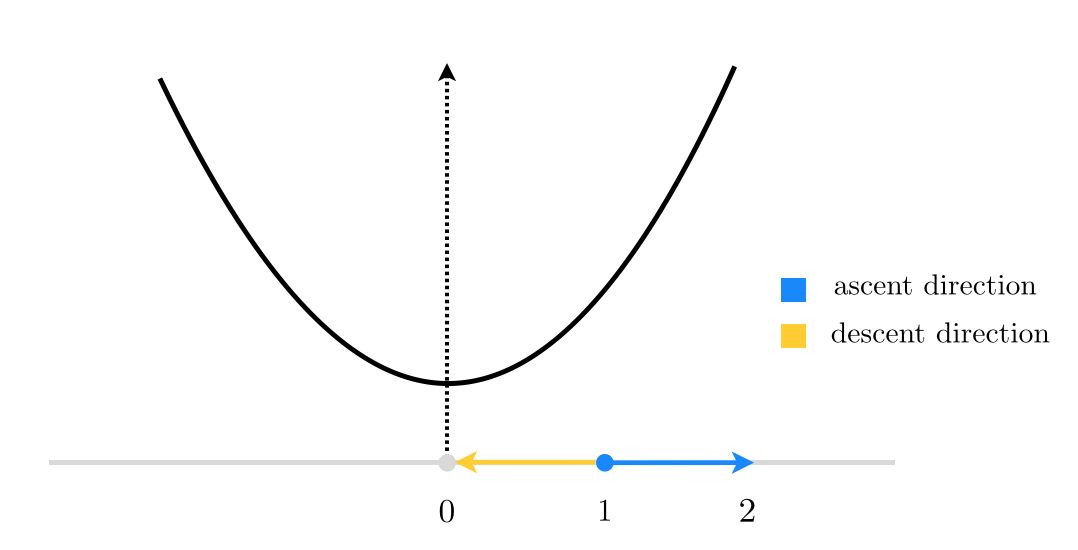

- Starting at $w^0=1$, there are only 2 unit directions we can move in.
- If we choose our direction randomly, we will have a 50% descent probability.

When $N=2$, starting at $\mathbf{w}^{0}=\left[\begin{array}{cc}
1 & 0\end{array}\right]^T$, we have infinitely many unit directions to choose from

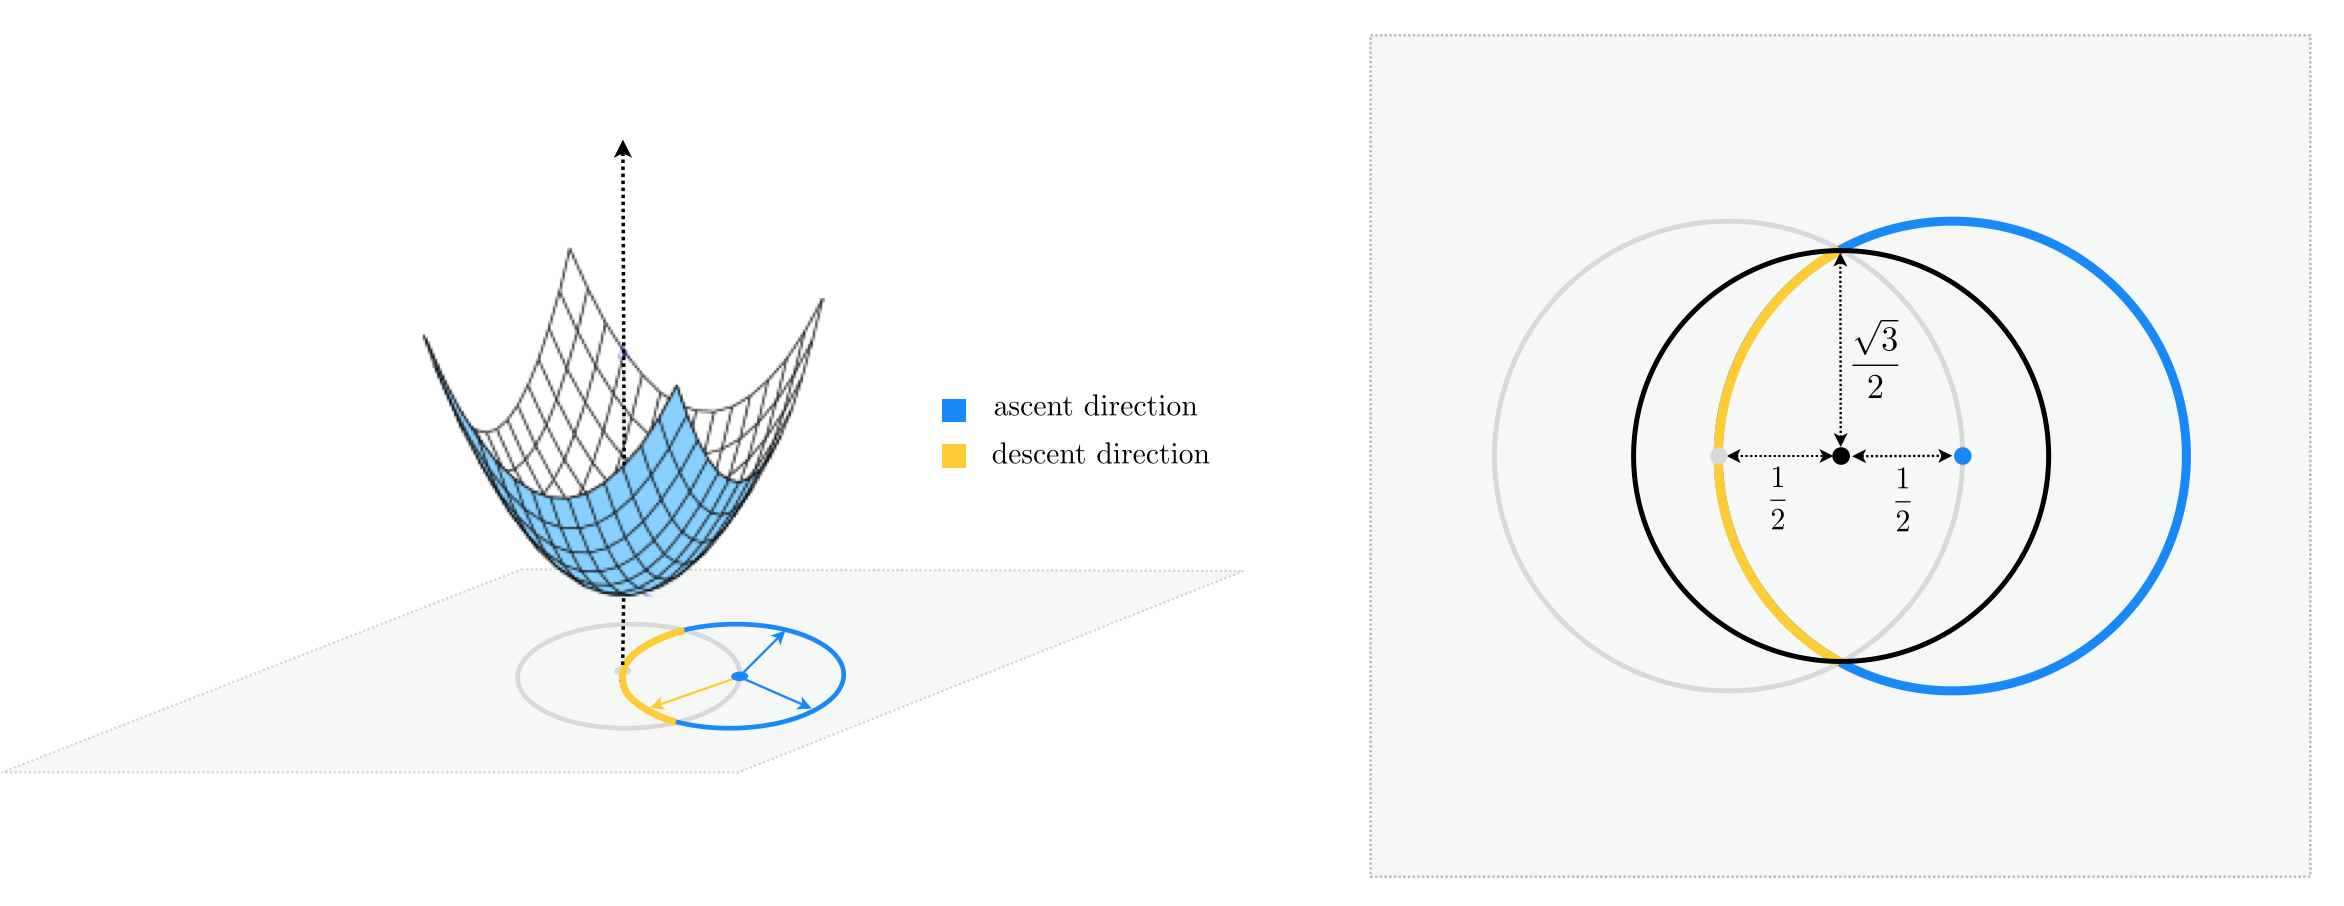

Only a fraction of the unit directions are descent directions:
\begin{equation*}
\text{descent probability}=\frac{\text{length of yellow arc}}{\text{length of unit circle}}
\end{equation*}

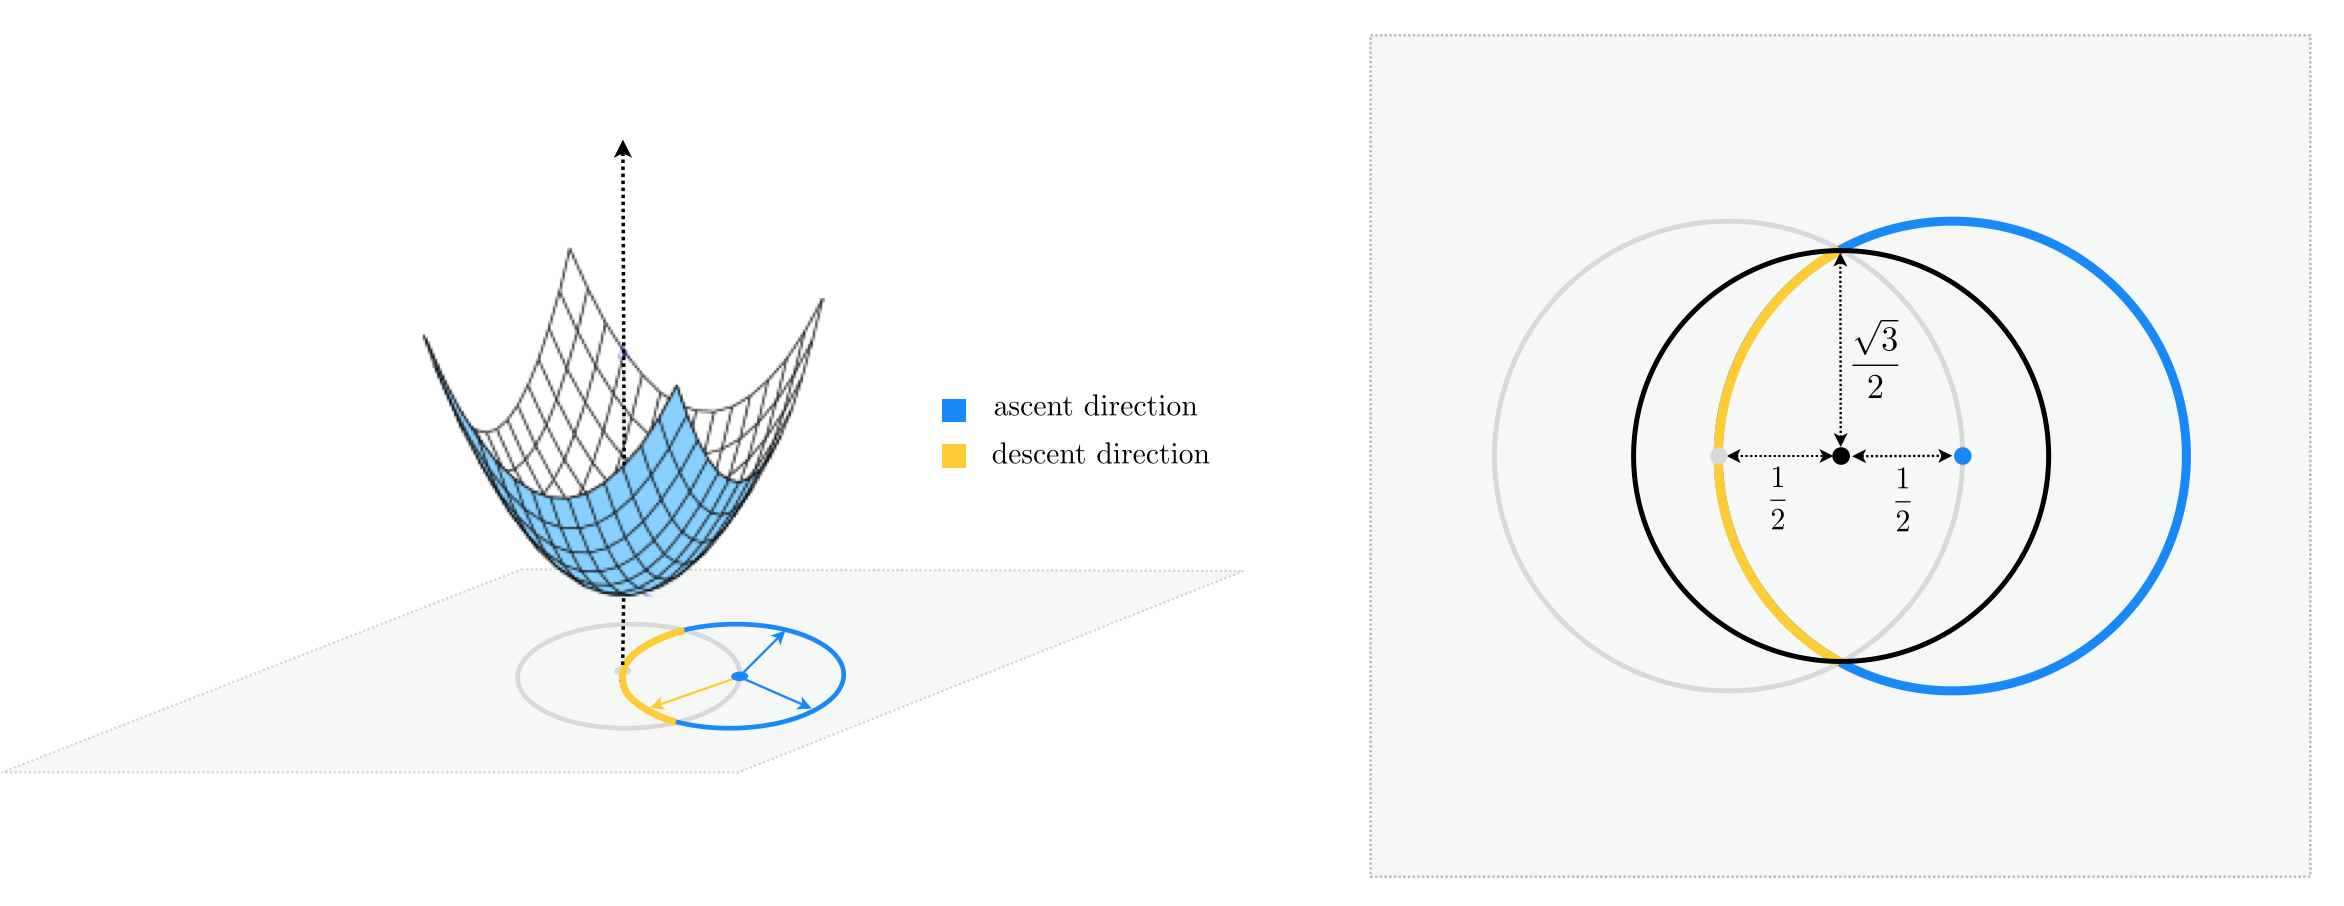

- The black circle centered at the midpoint of $\mathbf{w}^{0}$ and the origin, completely encompasses the yellow arc.
\begin{equation*}
\text{descent probability}<\frac{1}{2}\cdot\frac{\text{length of black circle}}{\text{length of unit circle}}
\end{equation*}

- The radius of the black circle is $\frac{\sqrt{3}}{2}$. Thus, the descent probabilility is:
\begin{equation*}
\text{descent probability}<\frac{1}{2}\cdot\frac{2\pi\left(\frac{\sqrt{3}}{2}\right)}{2\pi\left(1\right)}=\frac{\sqrt{3}}{4}=0.433
\end{equation*}    

- As the input dimension becomes larger, the descent probability shrinks exponentially in $N$.
<font size='2pt'>
\begin{align*}
\text{descent probability}&<\frac{1}{2}\cdot\frac{\text{surface area of encompassing hypersphere of radius } \frac{\sqrt{3}}{2}}{\text{surface area of unit hypersphere}}\\
 &=\frac{1}{2}\cdot\left(\frac{\sqrt{3}}{2}\right)^{N-1}
\end{align*}
</font>

- When $N=30$, the descent probability falls below $1\%$.

- Many modern machine learning loss functions have input dimension $N$ on the order of thousands to hundreds of millions, random search itself is not pratically useful.
- The biggest problem with random local search is the highly inefficient way in which **descent directions** are found. We need a better (i.e., computationally cheaper) way of finding descent directions.

### Formalizing the search for the best descent direction

- Random local search start at an initialization point $\mathbf{w}^0$.

- At the $k^{th}$ step of the algorithm, we decide a unit-length descent direction $\mathbf{d}$ by sampling $P$ random unit-length directions stemming from $\mathbf{w}^{k-1}$.
- This gives $P$ random points on the *<font color='red'>unit hypershere</font>* centered at $\mathbf{w}^{k-1}$.
- We choose the point that has the smallest evaluation on the function $g$.

- This is approximate to searching for the minimum value of $g$ over the unit hypershere centered at $\mathbf{w}^{k-1}$.
\begin{equation*}
\begin{array}
\
\underset{\mathbf{d}}{\text{minimize}}\,\,\,g\left(\mathbf{w}^{k-1} + \mathbf{d}^{\,}\right) \\
  \text{subject to} \,\, \Vert \mathbf{d} \Vert_2 = 1.
\end{array}
\end{equation*}

# Coordinate Search and Descent

### Coordinate Search

- Random search algorithms are designed to minimize a function $g\left(w_1,w_2,...,w_N\right)$ with respect to all of its parameters *<font color='red'>simultaneously</font>*.

- Coordinate-wise algorithms attempt to minimize the function $g$ with respect to **<font color='red'>one coordinate</font>** (or weight) at a time **while keeping all others fixed**.

- Coordinate-wise algoirhtms are more **scalable** than random search.

### Searching through the coordinate axes

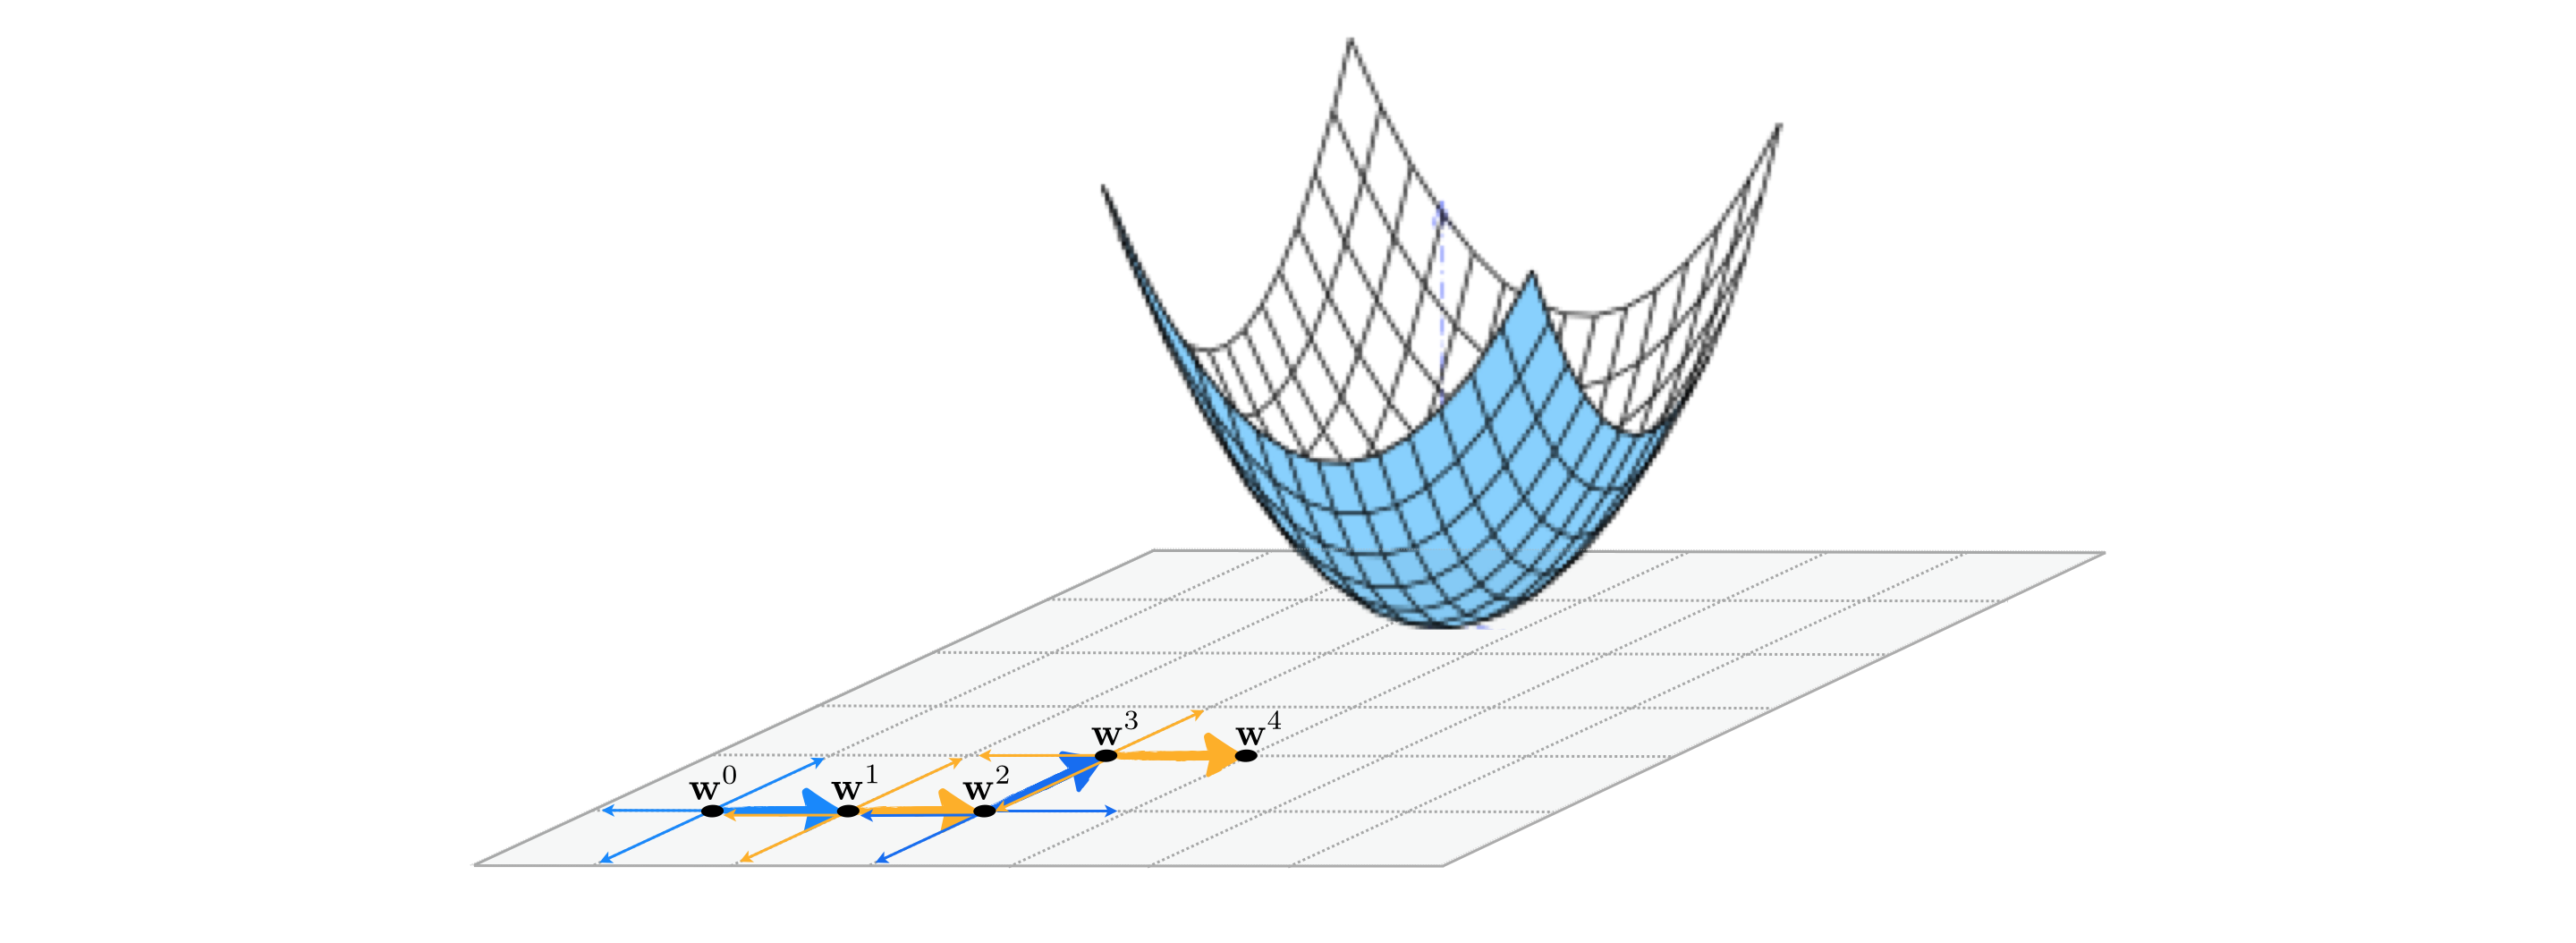

- For $N=2$, we try $2N=4$ directions along the $N=2$ coordinate axes and pick the one resulting the largest decrease in the function's evaluation.

- In a general $N$ dimensional input space, the $n^{th}$ standard basis vector ($\mathbf{e}_n$) is just a vector of all *zeros* with the $n^{th}$ entry setting to $1$.

-  At the $k^{th}$ step of algorithm, we only look over the set of $2N$ candidate directions $\left\{\pm \, \mathbf{e}_n \right\}_{n=1}^N$. Each pair of candidate points using a single standard basis direction is:
\begin{equation*}
\mathbf{w}_{\text{candidate}} = \mathbf{w}^{k-1} \pm \alpha \mathbf{e}_n.
\end{equation*}

### Zero-order coordinate descent

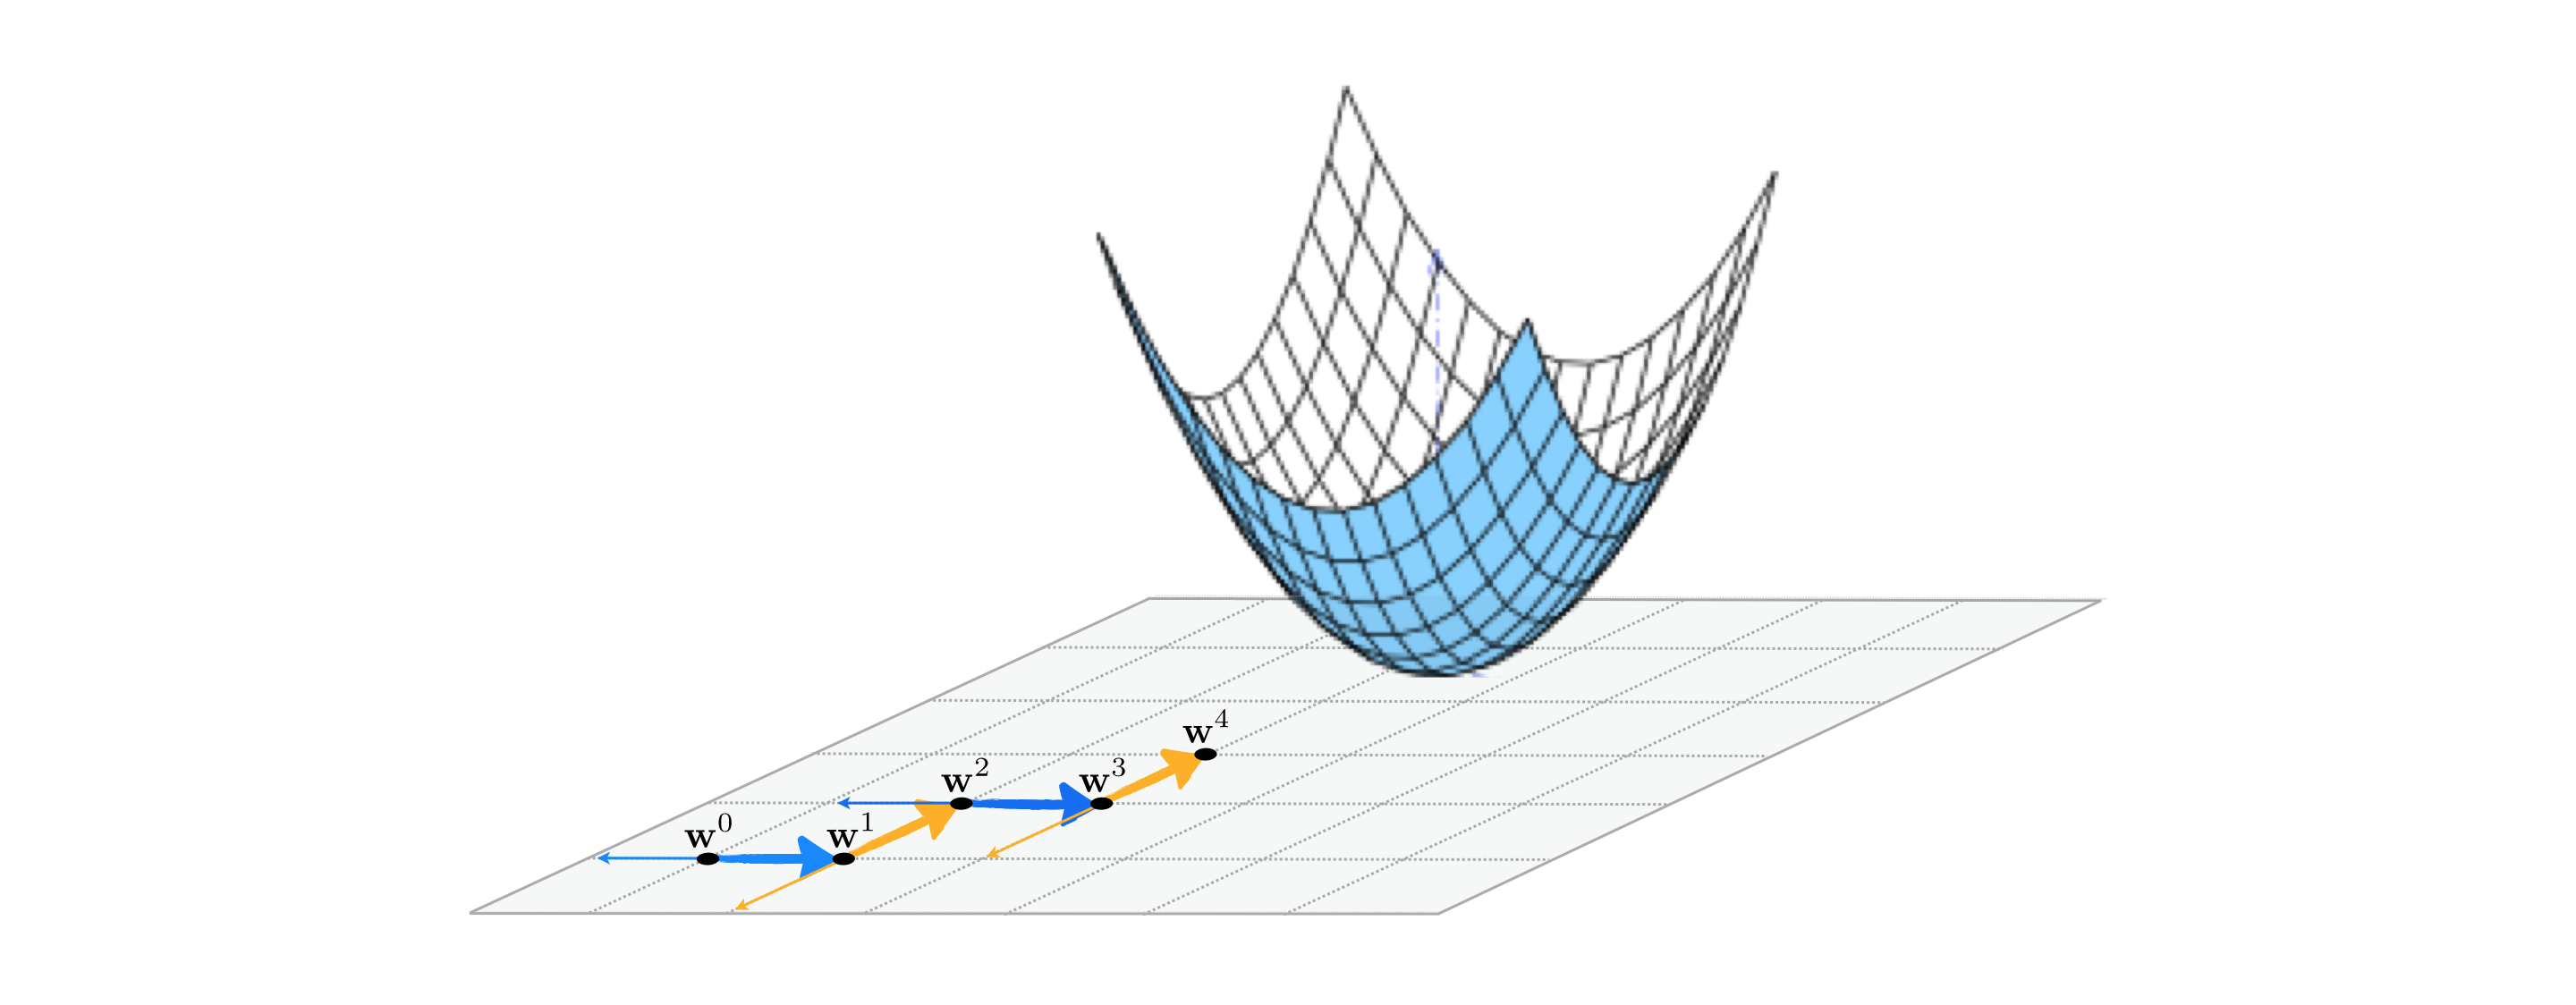

- With coordinate search, we evaluate the cost function $2N$ times (one per coordinate direction and its negative) to produce a single step.

- We can simply examine one coordinate direction (and its negative) at a time, and step in this direction if it produces a descent.

- This is called the **<font color='red'>coordinate descent</font>** algorithm.

In [31]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import autograd.numpy as np
import math


class Visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 
        
    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_plot(self,g,w_hist,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        
        # show original contour function as well?
        show_original = True
        if 'show_original' in kwargs:
            show_original = kwargs['show_original']

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 
        
        if show_original == False:
            gs = gridspec.GridSpec(1, 1) 
            ax2 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.edgecolor = 'k'
        self.draw_weight_path(ax2,w_hist,**kwargs)        # draw path on contour plot
        
        if show_original == True:
            self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()

        
    ##### draw picture of function and run for two-input function ####       
    def compare_runs_contour_plots(self,g,weight_histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        self.edgecolor = 'k'
         
        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot
        w_hist = weight_histories[0]
        self.draw_weight_path(ax1,w_hist)        # draw path on contour plot
        
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        w_hist = weight_histories[1]
        self.draw_weight_path(ax2,w_hist)        # draw path on contour plot
        
        # plot
        plt.show()   
        
        
    # compare cost histories from multiple runs
    def plot_cost_histories(self,histories,start,**kwargs):
        # plotting colors
        colors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 
        
        # any labels to add?        
        labels = [' ',' ']
        if 'labels' in kwargs:
            labels = kwargs['labels']
            
        # plot points on cost function plot too?
        points = False
        if 'points' in kwargs:
            points = kwargs['points']

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(histories)):
            history = histories[c]
            label = 0
            if c == 0:
                label = labels[0]
            else:
                label = labels[1]
                
            # check if a label exists, if so add it to the plot
            if np.size(label) == 0:
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c]) 
            else:               
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c],label = label) 
                
            # check if points should be plotted for visualization purposes
            if points == True:
                ax.scatter(np.arange(start,len(history),1),history[start:],s = 90,color = colors[c],edgecolor = 'w',linewidth = 2,zorder = 3) 


        # clean up panel
        xlabel = 'step $k$'
        if 'xlabel' in kwargs:
            xlabel = kwargs['xlabel']
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        if 'ylabel' in kwargs:
            ylabel = kwargs['ylabel']
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        if np.size(label) > 0:
            anchor = (1,1)
            if 'anchor' in kwargs:
                anchor = kwargs['anchor']
            plt.legend(loc='upper right', bbox_to_anchor=anchor)
            #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

        ax.set_xlim([start - 0.5,len(history) - 0.5])
        
       # fig.tight_layout()
        plt.show()

        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec

    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,color = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx
                

In [32]:
# zero order coordinate search
def coordinate_search(g,alpha_choice,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

# zero order coordinate descent
def coordinate_descent_zero_order(g,alpha_choice,max_its,w):  
    # run coordinate search
    N = np.size(w)
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # random shuffle of coordinates
        c = np.random.permutation(N)
        
        # forming the dirction matrix out of the loop
        cost = g(w)
        
        # loop over each coordinate direction
        for n in range(N):
            direction = np.zeros((N,1)).flatten()
            direction[c[n]] = 1
     
            # record weights and cost evaluation
            weight_history.append(w)
            cost_history.append(cost)

            # evaluate all candidates
            evals =  [g(w + alpha*direction)]
            evals.append(g(w - alpha*direction))
            evals = np.array(evals)

            # if we find a real descent direction take the step in its direction
            ind = np.argmin(evals)
            if evals[ind] < cost_history[-1]:
                # take step
                w = w + ((-1)**(ind))*alpha*direction
                cost = evals[ind]
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

### Coordinate search versus Coordinate descent

In [35]:
plotter = Visualizer()

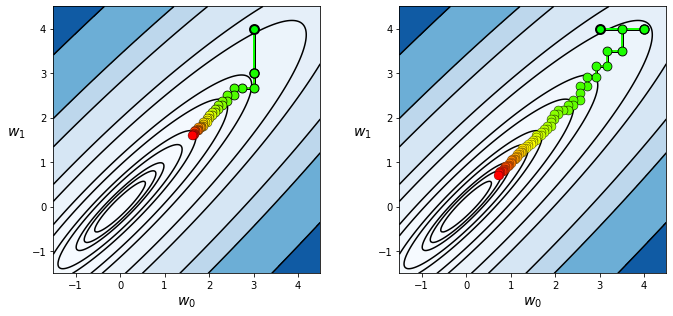

In [36]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]
# run coordinate search algorithm 
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_1,cost_history_1 = coordinate_search(g,alpha_choice,max_its,w)
# run coordinate descent algorithm
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_2,cost_history_2 = coordinate_descent_zero_order(g,alpha_choice,max_its,w)

plotter.compare_runs_contour_plots(g,[weight_history_1,weight_history_2],xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 30)

- Using a diminishing step length for both runs of coordinate search and coordinate descent. After 20 steps, coordinate descent gets much closer to the function minimum.

- In $N=2$ dimensional input space, coordinate descent takes two steps for every step staken by coordinate search.

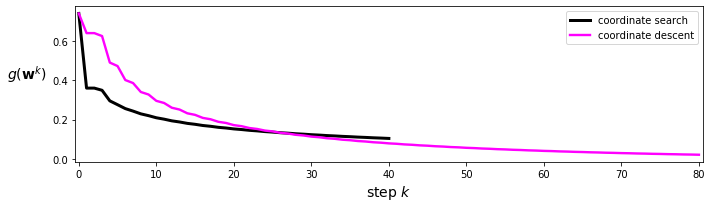

In [37]:
plotter.plot_cost_histories([cost_history_1,cost_history_2],start = 0,points = False,labels = ['coordinate search','coordinate descent'])

- The first several steps of coordinate search are more effective because it search over the entire list of coordinate directions instead of one at a time.

- The coordinate descent method quickly overtakes the search, finding a lower point on the cost function.

### Conclusion

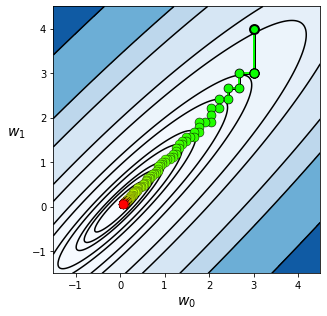

- Coordinate search requires only $2N$ function evaluations per step compared to $P$ random sample directions in random search.

- While $P$ grow exponentially in $N$ for (naive) random search to be effective, coordinate-wise algorithms are more scalable.